# <center><u>Capstone Project - Credit Card Fraud Detection

## Importing Libraries and Reading Data:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Checking shape of the DataFrame:

In [3]:
data.shape

(284807, 31)

##### Checking Null values:

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We see that there is no Null value in the data.

##### Getting statistical view of data:

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Observing different feature type present in the data:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

##### Observing percentage  of Fraud and Non-fraud Transactions:

In [7]:
classes=data['Class'].value_counts()
normal_share=classes[0]/data['Class'].count()*100
fraud_share=classes[1]/data['Class'].count()*100

print(classes)
print("******************************************")
print("Normal Transactions: {} %".format(normal_share))
print("Fraud Transactions: {} %".format(fraud_share))


0    284315
1       492
Name: Class, dtype: int64
******************************************
Normal Transactions: 99.82725143693798 %
Fraud Transactions: 0.1727485630620034 %


##### Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations:

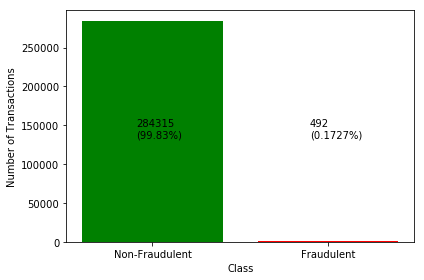

In [8]:
plt.bar(['Non-Fraudulent','Fraudulent'], classes, color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

plt.annotate('{}\n({:.4}%)'.format(classes[0], normal_share), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(classes[1], fraud_share), (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()

##### Creating a scatter plot to observe the distribution of classes with time:

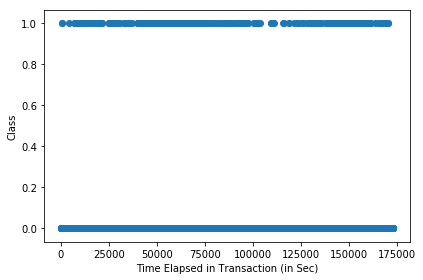

In [9]:
plt.scatter(data['Time'], data['Class'])
plt.xlabel('Time Elapsed in Transaction (in Sec)')
plt.ylabel('Class')
plt.tit
plt.tight_layout()
plt.show()

As this data is for 2 days, we haven't observed any specific pattern between "Time" and "Class".

##### Creating a scatter plot to observe the distribution of classes with Amount:

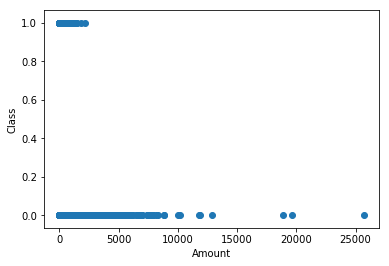

In [11]:
plt.scatter(data['Amount'], data['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

We see that most of the big amount transactions belong to Class 0. This is 2 days data, so we cannot draw perfect trend with this between `Amount` and `Class`.

##### Dropping unnecessary columns:

The column `Time` will not contribute anything in the analysis. Hence, dropping it from the dataset:

In [13]:
data = data.drop(columns=['Time'])

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into Train & Test (Without using stratified split):

At this moment we are using normal Train-Test split without startified split. Later while handling Data Imbalance, we'll use startified split.

In [18]:
y = data['Class']
X = data.drop(columns=['Class'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
print(len(X_train))
print(len(X_test))

199364
85443


In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,...,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,0.26
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,...,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,1.29
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,...,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,71.99
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,...,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,0.89
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,...,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,5.99


##### Checking Skewness in the Train Data using Histogram:

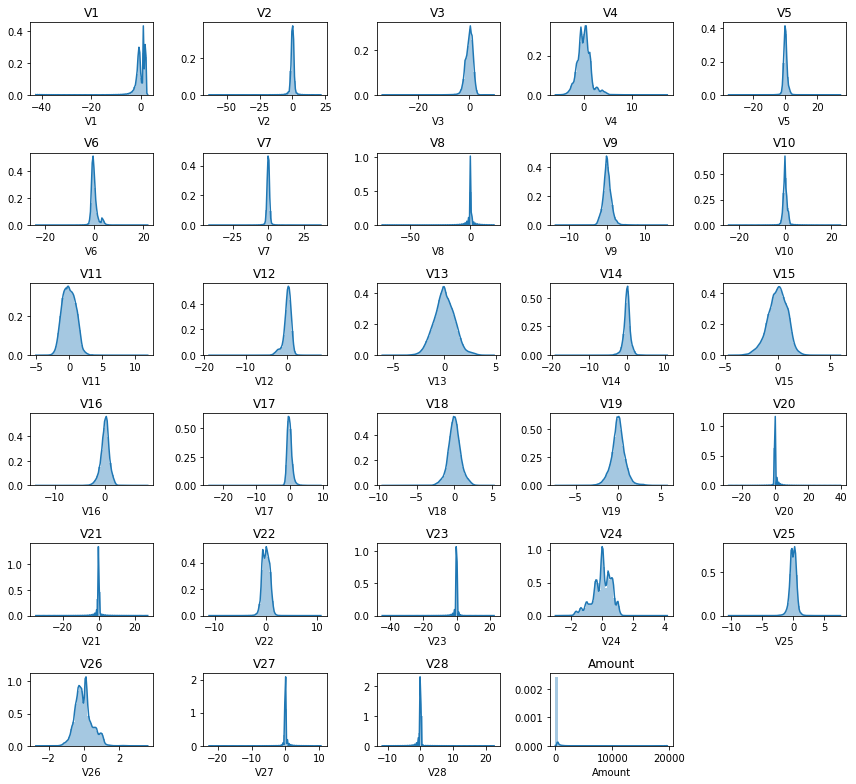

In [25]:
plt.figure(figsize=(12,11))
for i in range(0, len(X_train.columns)):
    plt.subplot(6,5,i+1)
    sns.distplot(X_train[X_train.columns[i]])
    plt.title(X_train.columns[i].title())
    plt.tight_layout()

We notice that the `Amount` column is highly skewed to right side. In this case, data points are treated as outliers and it will impact our analysis.

##### Observing Histogram of `Amount` column only:

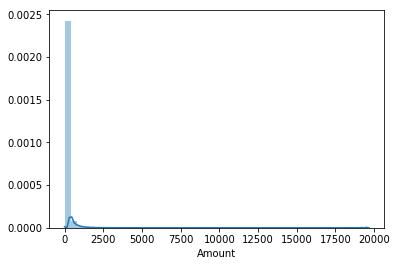

In [26]:
sns.distplot(X_train['Amount'])
plt.title("Skewness in Amount Column")
plt.show()

##### Let's quantify the skewness in `Amount` Column:

In [27]:
X_train['Amount'].skew()

14.97932041235742

We see that the skewness is around 15, which is high enough and will impact teh analysis. Let's handle this skewness.

### Power Transformation to handle data skewness in `Amount` Column:

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt = PowerTransformer()
X_train[['Amount']] = pt.fit_transform(X_train[['Amount']])

##### Let's re-check the Histogram to see the distribution:

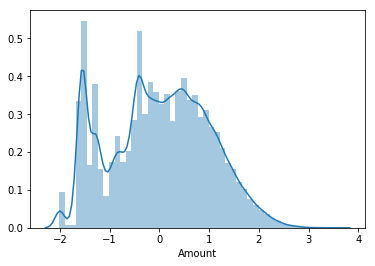

In [30]:
sns.distplot(X_train['Amount'])
plt.title("Distribution of 'Amount' in Train Data")
plt.show()

##### Let's re-quantify the skewness after Power Transformation:

In [31]:
X_train['Amount'].skew()

0.018434209676831133

We see that skewness is very low now, close to 0.02.

##### Checking Skewness in the Test Data using Histogram:

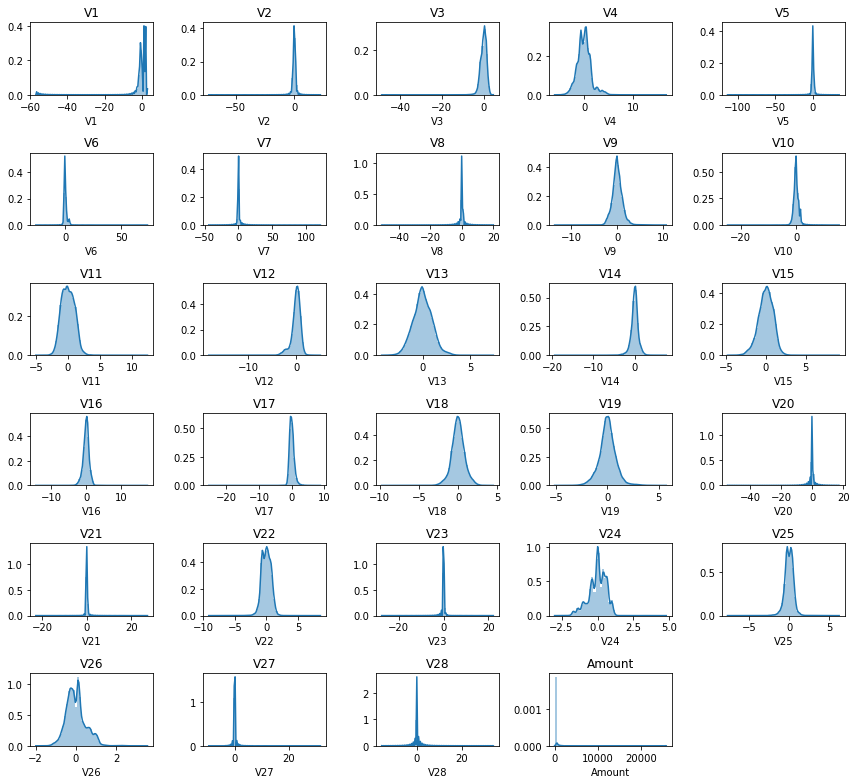

In [32]:
plt.figure(figsize=(12,11))
for i in range(0, len(X_test.columns)):
    plt.subplot(6,5,i+1)
    sns.distplot(X_test[X_test.columns[i]])
    plt.title(X_test.columns[i].title())
    plt.tight_layout()

##### Handling Skewness in test data using Power Transformation:

In [33]:
pt = PowerTransformer()
X_test[['Amount']] = pt.fit_transform(X_test[['Amount']])

##### Let's re-check the Histogram to see the distribution:

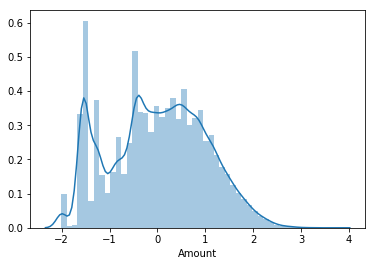

In [34]:
sns.distplot(X_test['Amount'])
plt.title("Distribution of 'Amount' in Test Data")
plt.show()

# <center><u>Model Building on Imbalanced Dataset<u><center>

We are going to build below 4 models first without handling data balancing techniques:
<br>**1.** Logistic Regression
<br>**2.** Decision Tree
<br>**3.** Random Forest
<br>**4.** XGBoost

## <center><u>Model 1: Logistic Regression

In [35]:
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)

In [36]:
model.coef_

array([[ 0.14619131, -0.09616829, -0.01236135,  0.69449196,  0.02031206,
        -0.08903707, -0.02027151, -0.21793033, -0.37894376, -0.81468909,
        -0.05654893, -0.03950695, -0.32164635, -0.605852  , -0.13919542,
        -0.16358344, -0.09665495,  0.03509877,  0.05408282, -0.38122672,
         0.36029311,  0.4138658 , -0.0601528 ,  0.11043201, -0.03776992,
        -0.00981137, -0.66033069, -0.2923753 ,  0.1636064 ]])

##### Getting predicted values on the training set:

In [37]:
y_train_pred = model.predict_proba(X_train)[:,1]
y_train_pred[:10]

array([1.47089784e-05, 9.81542351e-05, 2.07459269e-05, 1.27982002e-04,
       1.63275282e-04, 1.18940460e-04, 5.45758771e-05, 1.72208271e-04,
       2.27354937e-04, 1.79739936e-04])

##### Reshaping the predicted values:

In [38]:
y_train_pred = y_train_pred.reshape(-1)

##### Resetting index of y_train:

In [39]:
y_train.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Class", "Class_Prob":

In [40]:
y_train_pred_final = pd.DataFrame({'Class':y_train.values, 'Class_Prob':y_train_pred})
y_train_pred_final.head()

,Class,Class_Prob
0,0,0.000015
1,0,0.000098
2,0,0.000021
3,0,0.000128
4,0,0.000163


##### Selecting a threshold value for the column "Class_Prob" as 0.5 and creating a column "Predicted Class" in the Dataframe which shows the value as 1 if Class_Prob is geater than 0.5, else shows the value as 0:

In [41]:
y_train_pred_final['Predicted Class'] = y_train_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Class,Class_Prob,Predicted Class
0,0,0.000015,0
1,0,0.000098,0
2,0,0.000021,0
3,0,0.000128,0
4,0,0.000163,0


##### Confusion Matix:

In [42]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Class'], y_train_pred_final['Predicted Class'])
print(confusion_train)

[[198991     23]
 [   113    237]]


##### Checking Accuracy:

In [43]:
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final['Class'], y_train_pred_final['Predicted Class'])))

Accuracy: 0.9993178307016312


##### Metrics other than Accuracy in Traing Data Set:

In [44]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.677143
Specificity,0.999884
False Positive Rate,0.000116
Positive Predictive Value,0.911538
Negative Predictive Value,0.999432


### Plotting ROC Curve for Training Data:

In [45]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'], drop_intermediate = False )

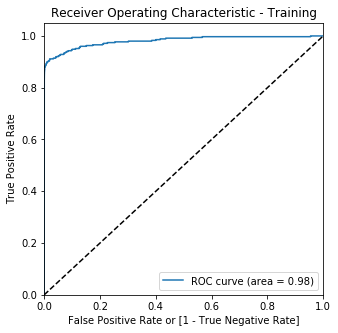

In [47]:
roc_curve(y_train_pred_final['Class'], y_train_pred_final['Class_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [48]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Class_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000015,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000098,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000021,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000128,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000163,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [49]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final['Class'], y_train_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.001756,1.000000,0.000000
0.1,0.1,0.999388,0.811429,0.999719
0.2,0.2,0.999368,0.774286,0.999764
0.3,0.3,0.999313,0.737143,0.999774
0.4,0.4,0.999308,0.708571,0.999819
0.5,0.5,0.999318,0.677143,0.999884
0.6,0.6,0.999288,0.651429,0.999900
0.7,0.7,0.999207,0.602857,0.999905
0.8,0.8,0.999147,0.568571,0.999905
0.9,0.9,0.999097,0.540000,0.999905


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

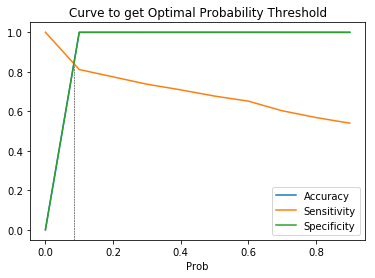

In [50]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.085, ymax= 0.80, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='best')
plt.show()

**From the above curve , 0.085 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.085:

In [51]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Class_Prob'].map( lambda x: 1 if x > 0.085 else 0)
y_train_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.000015,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000098,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000021,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000128,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000163,0,1,0,0,0,0,0,0,0,0,0,0


##### Checking Accuracy:

In [52]:
accuracy = metrics.accuracy_score(y_train_pred_final['Class'], y_train_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9993830380610341


##### New Confusion matrix fo training:

In [53]:
confusion_new = metrics.confusion_matrix(y_train_pred_final['Class'], y_train_pred_final['Final_Predicted'])
confusion_new

array([[198953,     61],
       [    62,    288]], dtype=int64)

##### Other Train Metrics:

In [54]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_train_pred_final['Class'], y_train_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_train_pred)


# Metrics Dataframe
metrics_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train = metrics_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train, 4)

,Metrics_Training
Accuracy,0.9994
Sensitivity,0.8229
Specificity,0.9997
True Positive Rate,0.8229
False Positive Rate,0.0003
Positive Predictive Value,0.8252
Negative Predictive Value,0.9997
Misclassification Rate,0.0006
Precision,0.8252
Recall,0.8229


### Making Prediction on Test Set:

In [55]:
y_test_pred = model.predict_proba(X_test)[:,1]
y_test_pred[:10]

array([1.67399504e-04, 9.97518064e-05, 3.46230010e-04, 1.04139678e-04,
       2.21526019e-02, 3.29222824e-05, 9.79184811e-05, 2.08295099e-04,
       8.82986178e-04, 2.33364077e-03])

##### Reshaping predicted values, resetting index of y_test and creating a Dataframe with "Class" and "Class_Prob" columns for Test set:

In [56]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.000167
1,0,0.000100
2,0,0.000346
3,0,0.000104
4,0,0.022153


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.085:

In [57]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.085 else 0)
y_test_pred_final.head()

,Class,Class_Prob,Final_Predicted
0,0,0.000167,0
1,0,0.000100,0
2,0,0.000346,0
3,0,0.000104,0
4,0,0.022153,0


### Plotting the ROC Curve for Test Data:

In [58]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'], drop_intermediate = False )

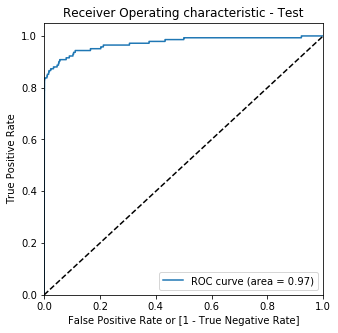

In [60]:
roc_curve_test(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])

In [61]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.9990637032875719


##### Confusion Matrix for Test data:

In [62]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[85254    47]
 [   33   109]]


##### Other Test Metrics:

In [63]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test = metrics_test.T.rename(columns={0: 'Metrics_Test'})
metrics_test = pd.concat([metrics_train, metrics_test], axis=1)
round(metrics_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9994,0.9991
Sensitivity,0.8229,0.7676
Specificity,0.9997,0.9994
True Positive Rate,0.8229,0.7676
False Positive Rate,0.0003,0.0006
Positive Predictive Value,0.8252,0.6987
Negative Predictive Value,0.9997,0.9996
Misclassification Rate,0.0006,0.0009
Precision,0.8252,0.6987
Recall,0.8229,0.7676


## <center><u>Model 2: Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_initial = DecisionTreeClassifier(max_depth=5)
dt_initial.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

##### Getting predicted values on the training set:

In [66]:
y_pred_train = dt_initial.predict(X_train)

##### Checking Classification Report:

In [67]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.82      0.89       350

    accuracy                           1.00    199364
   macro avg       0.98      0.91      0.94    199364
weighted avg       1.00      1.00      1.00    199364



##### Confusion Matrix for Training: 

In [68]:
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[199005,      9],
       [    63,    287]], dtype=int64)

##### Checking Train Accuracy:

In [69]:
print("Accuracy: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy: 0.9996388515479224


##### Other Train Metrics:

In [70]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_train, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train)

# Metrics Dataframe:
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
metrics_dtree_train

,Metrics_Training
Accuracy,0.999639
Sensitivity,0.820000
Specificity,0.999955
True Positive Rate,0.820000
False Positive Rate,0.000045
Positive Predictive Value,0.969595
Negative Predictive Value,0.999684
Misclassification Rate,0.000361
Precision,0.969595
Recall,0.820000


##### Getting Predicted value on Test set:

In [71]:
y_pred_test = dt_initial.predict(X_test)

##### Confusion Matrix for Test:

In [72]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85277,    24],
       [   41,   101]], dtype=int64)

##### Checking Test Accuracy:

In [73]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy: 0.9992392589211521


##### Other Test Metrics:

In [74]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)
#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,1.00,1.00
Sensitivity,0.82,0.71
Specificity,1.00,1.00
True Positive Rate,0.82,0.71
False Positive Rate,0.00,0.00
Positive Predictive Value,0.97,0.81
Negative Predictive Value,1.00,1.00
Misclassification Rate,0.00,0.00
Precision,0.97,0.81
Recall,0.82,0.71


Let's tune the hyperparameter to get optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [75]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [76]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.694693,0.071425,0.025267,0.004771,2,{'max_depth': 2},0.999323,0.999278,0.999473,0.999358,0.000084,2,0.999406,0.999398,0.999345,0.999383,0.000027
1,9.289005,0.052894,0.038565,0.004908,7,{'max_depth': 7},0.999353,0.999353,0.999428,0.999378,0.000035,1,0.999707,0.999767,0.999714,0.999729,0.000027
2,13.886920,0.712417,0.034338,0.016690,12,{'max_depth': 12},0.999157,0.999248,0.999383,0.999263,0.000093,3,0.999850,0.999932,0.999850,0.999877,0.000039
3,17.345635,1.894076,0.036785,0.007840,17,{'max_depth': 17},0.998992,0.999187,0.999233,0.999137,0.000104,4,0.999940,1.000000,0.999955,0.999965,0.000026
4,17.063210,2.787328,0.026036,0.007363,22,{'max_depth': 22},0.998992,0.999187,0.999142,0.999107,0.000084,5,1.000000,1.000000,0.999992,0.999997,0.000004


##### Plotting Accuracies with max_depth:

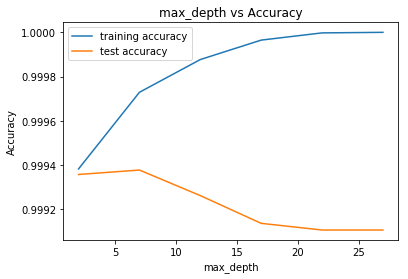

In [77]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both training and test score increase. After the value 22, the test score gradually reduces and train score increases. The model overfits the data at high value of max_depth.

#### (ii) min_samples_leaf Tuning:

In [78]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [79]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.902676,2.722485,0.031244,1.030086e-06,5,{'min_samples_leaf': 5},0.999443,0.999383,0.999564,0.999463,0.000075,1,0.999646,0.999654,0.999624,0.999641,0.000013
1,15.718067,2.930713,0.020830,7.364628e-03,25,{'min_samples_leaf': 25},0.999218,0.999187,0.999458,0.999288,0.000121,2,0.999330,0.999285,0.999398,0.999338,0.000046
2,14.951486,2.766045,0.031243,1.512074e-06,45,{'min_samples_leaf': 45},0.999082,0.999097,0.999112,0.999097,0.000012,10,0.999218,0.999210,0.999172,0.999200,0.000020
3,15.044822,2.638997,0.025978,7.322372e-03,65,{'min_samples_leaf': 65},0.999082,0.999097,0.999278,0.999152,0.000089,3,0.999218,0.999210,0.999112,0.999180,0.000048
4,14.680720,1.867501,0.015623,8.920806e-07,85,{'min_samples_leaf': 85},0.999082,0.999097,0.999278,0.999152,0.000089,3,0.999218,0.999210,0.999112,0.999180,0.000048


##### Plotting Accuracies with min_samples_leaf:

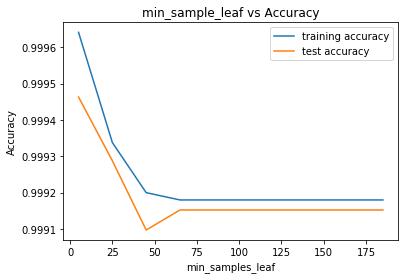

In [80]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_sample_leaf vs Accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf, the tree shows overfitting. After the value 65, the model becomes more stable and performs well.

#### (iii) min_samples_split Tuning:

In [81]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV :

In [82]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.814893,2.634069,0.036453,7.365078e-03,5,{'min_samples_split': 5},0.998977,0.999233,0.999202,0.999137,0.000114,10,0.999962,0.999955,0.999902,0.999940,0.000027
1,16.671521,2.759320,0.031631,5.501597e-04,25,{'min_samples_split': 25},0.999007,0.999233,0.999308,0.999182,0.000128,9,0.999759,0.999804,0.999722,0.999762,0.000034
2,16.859303,3.000631,0.031243,2.135440e-06,45,{'min_samples_split': 45},0.999142,0.999263,0.999278,0.999228,0.000061,7,0.999669,0.999699,0.999639,0.999669,0.000025
3,17.240264,2.797673,0.031243,4.052337e-07,65,{'min_samples_split': 65},0.999187,0.999293,0.999278,0.999253,0.000047,4,0.999661,0.999676,0.999639,0.999659,0.000015
4,17.893135,3.105048,0.031467,3.173948e-04,85,{'min_samples_split': 85},0.999187,0.999293,0.999278,0.999253,0.000047,4,0.999661,0.999661,0.999639,0.999654,0.000011


##### Plotting Accuracies with min_samples_split:

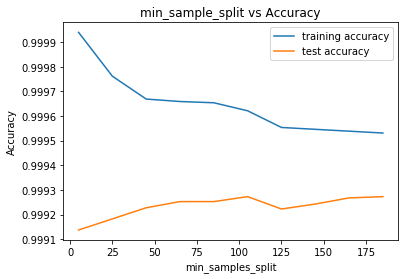

In [83]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_sample_split vs Accuracy")
plt.legend()
plt.show()

This shows that at low values, model overfits. As we increase the min_samples_split, the tree starts performing well after the value 50.

##### Randomized Search to Find Optimal Hyperparameters:

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 35, 5),
    'min_samples_leaf': range(5, 150, 50),
    'min_samples_split': range(5, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the Randomized search model
dtree = DecisionTreeClassifier(random_state = 100)
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, scoring="accuracy", verbose = 1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 35, 5),
                                        'min_samples_leaf': range(5, 150, 50),
                                        'min_samples_split': range(5, 150, 50)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Cross Validation results:

In [85]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.355488,0.678523,0.022287,0.006579,55,5,25,entropy,"{'min_samples_split': 55, 'min_samples_leaf': ...",0.999413,0.999443,0.999488,0.999448,0.000031,2,0.999541,0.999586,0.999436,0.999521,0.000063
1,10.846971,0.324212,0.020832,0.007362,105,5,10,gini,"{'min_samples_split': 105, 'min_samples_leaf':...",0.999398,0.999428,0.999518,0.999448,0.000051,1,0.999511,0.999503,0.999451,0.999488,0.000027
2,11.185124,0.518078,0.026038,0.007362,55,105,20,entropy,"{'min_samples_split': 55, 'min_samples_leaf': ...",0.999082,0.999142,0.999037,0.999087,0.000043,4,0.999218,0.999187,0.999165,0.999190,0.000022
3,10.625386,0.250422,0.026035,0.007363,105,105,10,gini,"{'min_samples_split': 105, 'min_samples_leaf':...",0.999082,0.999097,0.999278,0.999152,0.000089,3,0.999218,0.999210,0.999112,0.999180,0.000048
4,11.174456,0.731503,0.020829,0.007366,105,105,25,entropy,"{'min_samples_split': 105, 'min_samples_leaf':...",0.999082,0.999142,0.999037,0.999087,0.000043,4,0.999218,0.999187,0.999165,0.999190,0.000022


##### Getting best parameters:

In [86]:
grid_search.best_params_

{'min_samples_split': 105,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'gini'}

##### Printing the optimal accuracy score and hyperparameters:

In [87]:
print("Best Accuracy: {}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

Best Accuracy: 0.9994482457726477
DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=105,
                       random_state=100)


##### Running the model with best parameters obtained from grid search:

In [88]:
# Model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=5,
                                  min_samples_split=5)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=100)

##### Getting predicted values on Training set:

In [89]:
y_pred_train_dt = dt_final.predict(X_train)

##### Checking Classification Report for training:

In [90]:
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.98      0.81      0.88       350

    accuracy                           1.00    199364
   macro avg       0.99      0.90      0.94    199364
weighted avg       1.00      1.00      1.00    199364



##### Confusion Matrix for training:

In [91]:
confusion_train = confusion_matrix(y_train, y_pred_train_dt)
confusion_train

array([[199007,      7],
       [    67,    283]], dtype=int64)

##### Accuracy Score for training:

In [92]:
print("Accuracy_Score: {}".format(dt_final.score(X_train, y_train)))

Accuracy_Score: 0.9996288196464758


##### Other Training Metrics:

In [93]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

accuracy = dt_final.score(X_train, y_train)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train_dt)

# Metrics Dataframe
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9996
Sensitivity,0.8086
Specificity,1.0000
True Positive Rate,0.8086
False Positive Rate,0.0000
Positive Predictive Value,0.9759
Negative Predictive Value,0.9997
Misclassification Rate,0.0004
Precision,0.9759
Recall,0.8086


##### Making prediction on Test set:

In [94]:
y_pred_test_dt = dt_final.predict(X_test)

##### Checking Classification Report for test:

In [95]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.87      0.73      0.80       142

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for test:

In [96]:
confusion_test = confusion_matrix(y_test, y_pred_test_dt)
confusion_test

array([[85286,    15],
       [   38,   104]], dtype=int64)

##### Accuracy Score for test:

In [97]:
print("Accuracy_Score: {}".format(dt_final.score(X_test, y_test)))

Accuracy_Score: 0.9993797034280163


##### Other Test Metrics:

In [98]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = dt_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9996,0.9994
Sensitivity,0.8086,0.7324
Specificity,1.0000,0.9998
True Positive Rate,0.8086,0.7324
False Positive Rate,0.0000,0.0002
Positive Predictive Value,0.9759,0.8739
Negative Predictive Value,0.9997,0.9996
Misclassification Rate,0.0004,0.0006
Precision,0.9759,0.8739
Recall,0.8086,0.7324


## <center><u>Model 3: Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc_initial = RandomForestClassifier(random_state=100, n_jobs = -1)
rfc_initial.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=100)

##### Getting predicted values on Training set:

In [100]:
y_pred_train = rfc_initial.predict(X_train)

##### Confusion Matrix:

In [101]:
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[199014,      0],
       [     0,    350]], dtype=int64)

##### Checking Train Accuracy:

In [102]:
print("Accuracy_Score: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [103]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_train, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [104]:
y_pred_test = rfc_initial.predict(X_test)

##### Confusion Matrix for Test:

In [105]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85286,    15],
       [   35,   107]], dtype=int64)

##### Checking Test Accuracy:

In [106]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9994148145547324


##### Other Test Metrics:

In [107]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9994
Sensitivity,1.0,0.7535
Specificity,1.0,0.9998
True Positive Rate,1.0,0.7535
False Positive Rate,0.0,0.0002
Positive Predictive Value,1.0,0.8770
Negative Predictive Value,1.0,0.9996
Misclassification Rate,0.0,0.0006
Precision,1.0,0.8770
Recall,1.0,0.7535


Let's tune hyperparameters to het optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `n_estimators`, `max_features`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [108]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [109]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,29.167506,0.654158,1.492115,0.306576,2,{'max_depth': 2},0.999127,0.999112,0.999187,0.999142,0.000033,6,0.999172,0.999180,0.999105,0.999152,0.000034
1,89.002873,1.818525,2.399514,0.346736,7,{'max_depth': 7},0.999534,0.999428,0.999564,0.999508,0.000058,5,0.999669,0.999722,0.999661,0.999684,0.000027
2,146.399406,2.612398,3.002924,0.061565,12,{'max_depth': 12},0.999564,0.999473,0.999564,0.999534,0.000043,2,0.999752,0.999804,0.999737,0.999764,0.000029
3,172.506431,6.309888,3.163351,0.079080,17,{'max_depth': 17},0.999549,0.999473,0.999564,0.999529,0.000039,3,0.999940,0.999955,0.999910,0.999935,0.000019
4,174.298724,7.546873,3.092628,0.110117,22,{'max_depth': 22},0.999549,0.999473,0.999564,0.999529,0.000039,3,1.000000,1.000000,0.999992,0.999997,0.000004


##### Plotting Accuracies with max_depth:

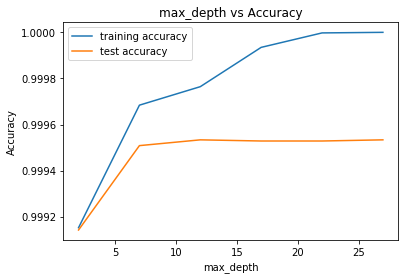

In [110]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores gradually increase till a point, but after that test score starts to decrease.

#### (ii) n_estimators Tuning:

In [111]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(50, 800, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1, random_state=100)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 23.1min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'n_estimators': range(50, 800, 200)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [112]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,65.604065,0.124936,1.019424,0.066317,50,{'n_estimators': 50},0.999518,0.999458,0.999534,0.999503,0.000033,4,0.999707,0.999759,0.999714,0.999727,0.000023
1,319.774205,1.445325,3.804950,0.353425,250,{'n_estimators': 250},0.999549,0.999473,0.999549,0.999523,0.000035,3,0.999714,0.999759,0.999722,0.999732,0.000020
2,574.121728,2.981583,6.339567,0.173968,450,{'n_estimators': 450},0.999534,0.999473,0.999564,0.999523,0.000038,2,0.999707,0.999767,0.999722,0.999732,0.000026
3,627.163798,126.806380,3.838542,1.736333,650,{'n_estimators': 650},0.999534,0.999473,0.999579,0.999529,0.000043,1,0.999707,0.999767,0.999722,0.999732,0.000026


##### Plotting Accuracies with n_estimators:

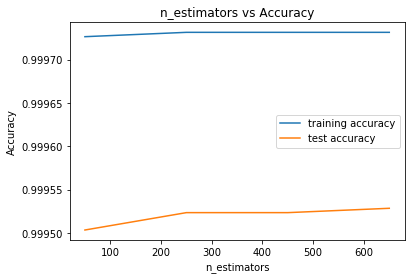

In [113]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

#### (iii) max_features Tuning:

In [114]:
# RandomizedSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose = 1, random_state=100, n_jobs=-1, return_train_score=True)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 15.8min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_features': [4, 8, 14, 24]},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [115]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,104.533806,0.995666,1.798862,0.107759,4,{'max_features': 4},0.999473,0.999428,0.999594,0.999498,0.000070,4,0.999699,0.999752,0.999714,0.999722,0.000022
1,200.861418,2.171335,2.709157,0.377544,8,{'max_features': 8},0.999564,0.999473,0.999594,0.999544,0.000051,1,0.999714,0.999782,0.999729,0.999742,0.000029
2,345.633557,1.262088,2.847966,0.020704,14,{'max_features': 14},0.999534,0.999473,0.999594,0.999534,0.000049,3,0.999737,0.999782,0.999744,0.999754,0.000020
3,458.425040,56.831274,1.023353,0.661644,24,{'max_features': 24},0.999518,0.999503,0.999594,0.999539,0.000039,2,0.999752,0.999812,0.999752,0.999772,0.000028


##### Plotting Accuracies with max_features:

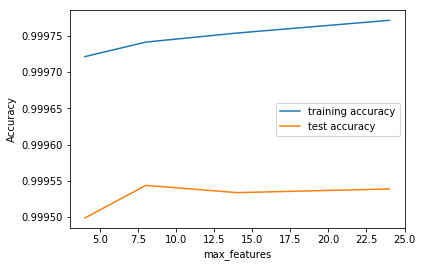

In [116]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (iv) min_samples_leaf Tuning:

In [117]:
# RandomizedSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(100, 400, 100)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [118]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,149.014821,7.272209,2.149531,0.706944,100,{'min_samples_leaf': 100},0.999067,0.999127,0.999127,0.999107,0.000028,1,0.999157,0.999135,0.999060,0.999117,0.000042
1,136.150926,4.575713,1.716379,0.414187,200,{'min_samples_leaf': 200},0.998239,0.998239,0.998254,0.998244,0.000007,2,0.998247,0.998247,0.998239,0.998244,0.000004
2,96.949163,37.523417,1.359670,0.814998,300,{'min_samples_leaf': 300},0.998239,0.998239,0.998254,0.998244,0.000007,2,0.998247,0.998247,0.998239,0.998244,0.000004


##### Plotting Accuracies with min_samples_leaf:

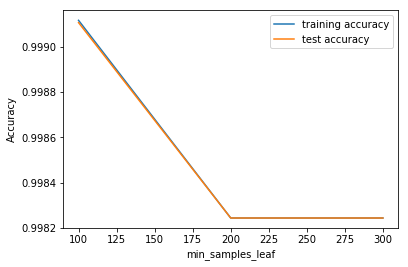

In [119]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (v) min_samples_split Tuning:

In [121]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.1min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(200, 500, 50)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [122]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,177.624820,5.181108,2.210242,0.770618,200,{'min_samples_split': 200},0.999263,0.999293,0.999428,0.999328,0.000072,1,0.999406,0.999406,0.999368,0.999393,0.000018
1,167.879635,7.502249,2.329078,0.421027,250,{'min_samples_split': 250},0.999218,0.999308,0.999368,0.999298,0.000062,2,0.999398,0.999421,0.999315,0.999378,0.000045
2,163.194876,7.096281,2.523065,0.102749,300,{'min_samples_split': 300},0.999187,0.999293,0.999353,0.999278,0.000068,6,0.999383,0.999413,0.999300,0.999365,0.000048
3,163.351113,7.976814,2.862308,0.420674,350,{'min_samples_split': 350},0.999218,0.999293,0.999353,0.999288,0.000055,5,0.999391,0.999406,0.999263,0.999353,0.000064
4,161.428116,8.266216,2.794133,0.340350,400,{'min_samples_split': 400},0.999263,0.999293,0.999338,0.999298,0.000031,3,0.999391,0.999406,0.999263,0.999353,0.000064


##### Plotting Accuracies with min_samples_split:

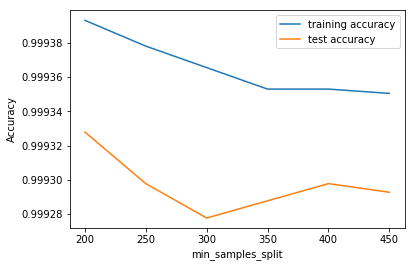

In [123]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Randomized Search to Find Optimal Hyperparameters:

In [124]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 35.9min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 300, 200),
                                        'min_samples_split': range(200, 400, 200),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, verbose=1)

##### Optimal Accuracy Score:

In [125]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9991673527334078


##### Optimal Hyperparameters:

In [126]:
grid_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 10}

In [127]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200, n_jobs=-1,
                       random_state=100)

##### Running the model with best parameters obtained from grid search:

In [128]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200, random_state=100,
                             n_jobs=-1)
rfc_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=200, n_jobs=-1,
                       random_state=100)

##### Getting predicted values on Training set:

In [129]:
y_pred_train_rf = rfc_final.predict(X_train)

##### Getting Classification Report for Training:

In [130]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.89      0.67      0.76       350

    accuracy                           1.00    199364
   macro avg       0.94      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364



##### Confusion Matrix for training:

In [131]:
confusion_train_rf = confusion_matrix(y_train, y_pred_train_rf)
confusion_train_rf

array([[198984,     30],
       [   116,    234]], dtype=int64)

##### Checking Training Accuracy:

In [132]:
print("Accuracy_Score: {}".format(rfc_final.score(X_train, y_train)))

Accuracy_Score: 0.9992676711943982


##### Other Training Metrics:

In [133]:
TP = confusion_train_rf[1,1] # true positive 
TN = confusion_train_rf[0,0] # true negatives
FP = confusion_train_rf[0,1] # false positives
FN = confusion_train_rf[1,0] # false negatives

accuracy = rfc_final.score(X_train, y_train)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train_rf)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,0.9993
Sensitivity,0.6686
Specificity,0.9998
True Positive Rate,0.6686
False Positive Rate,0.0002
Positive Predictive Value,0.8864
Negative Predictive Value,0.9994
Misclassification Rate,0.0007
Precision,0.8864
Recall,0.6686


##### Making prediction on Test:

In [134]:
y_pred_test_rf = rfc_final.predict(X_test)

##### Getting Classification Report for Test:

In [135]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.77      0.62      0.69       142

    accuracy                           1.00     85443
   macro avg       0.89      0.81      0.84     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [136]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)
confusion_test_rf

array([[85275,    26],
       [   54,    88]], dtype=int64)

##### Checking Test Accuracy:

In [137]:
print("Accuracy_Score: {}".format(rfc_final.score(X_test, y_test)))

Accuracy_Score: 0.9990637032875719


##### Other Test Metrics:

In [138]:
TP = confusion_test_rf[1,1] # true positive 
TN = confusion_test_rf[0,0] # true negatives
FP = confusion_test_rf[0,1] # false positives
FN = confusion_test_rf[1,0] # false negatives

accuracy = rfc_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9993,0.9991
Sensitivity,0.6686,0.6197
Specificity,0.9998,0.9997
True Positive Rate,0.6686,0.6197
False Positive Rate,0.0002,0.0003
Positive Predictive Value,0.8864,0.7719
Negative Predictive Value,0.9994,0.9994
Misclassification Rate,0.0007,0.0009
Precision,0.8864,0.7719
Recall,0.6686,0.6197


## <center><u>Model 4: XGBoost

In [139]:
from xgboost import XGBClassifier
xgb_initial = XGBClassifier(random_state=100)
xgb_initial.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [140]:
y_pred_train = xgb_initial.predict(X_train)

##### Confusion Matrix:

In [141]:
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[199014,      0],
       [     0,    350]], dtype=int64)

##### Checking Train Accuracy:

In [142]:
print("Accuracy_Score: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [143]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_train, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 2)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [144]:
y_pred_test = xgb_initial.predict(X_test)

##### Confusion Matrix for Test:

In [145]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85291,    10],
       [   33,   109]], dtype=int64)

##### Checking Test Accuracy:

In [146]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9994967405170698


##### Other Test Metrics:

In [147]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,1.0,1.00
Sensitivity,1.0,0.77
Specificity,1.0,1.00
True Positive Rate,1.0,0.77
False Positive Rate,0.0,0.00
Positive Predictive Value,1.0,0.92
Negative Predictive Value,1.0,1.00
Misclassification Rate,0.0,0.00
Precision,1.0,0.92
Recall,1.0,0.77


## Hyperparameter Optimization:
We are going to tune the features `max_depth` and `n_estimators`:

#### (i) max_depth Tuning:

In [148]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 30, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Scores of GridSearch CV:

In [149]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,107.586652,4.044586,0.521499,0.007652,5,{'max_depth': 5},0.999549,0.999549,0.999549,0.999549,3.202331e-09,5,1.0,1.0,1.0,1.0,0.0
1,123.762257,7.679966,0.526522,0.032759,10,{'max_depth': 10},0.999579,0.999534,0.999579,0.999564,2.127928e-05,1,1.0,1.0,1.0,1.0,0.0
2,125.225322,7.862176,0.510300,0.032098,15,{'max_depth': 15},0.999579,0.999534,0.999579,0.999564,2.127928e-05,1,1.0,1.0,1.0,1.0,0.0
3,125.060363,8.301548,0.536737,0.014157,20,{'max_depth': 20},0.999579,0.999534,0.999579,0.999564,2.127928e-05,1,1.0,1.0,1.0,1.0,0.0
4,96.569414,3.961872,0.374912,0.033748,25,{'max_depth': 25},0.999579,0.999534,0.999579,0.999564,2.127928e-05,1,1.0,1.0,1.0,1.0,0.0


##### Plotting Accuracies with max_depth:

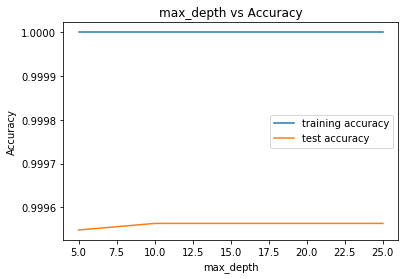

In [150]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

#### (ii) n_estimators Tuning:

In [151]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(2, 25, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

In [152]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.661071,0.122193,0.171835,0.012755,2,{'n_estimators': 2},0.999503,0.999488,0.999549,0.999513,0.000026,5,0.999654,0.999676,0.999646,0.999659,0.000013
1,9.930167,0.547545,0.161421,0.019484,7,{'n_estimators': 7},0.999503,0.999518,0.999564,0.999529,0.000026,3,0.999669,0.999752,0.999699,0.999707,0.000034
2,16.676640,1.170944,0.156213,0.000002,12,{'n_estimators': 12},0.999549,0.999488,0.999534,0.999523,0.000026,4,0.999714,0.999774,0.999722,0.999737,0.000027
3,24.079890,1.208409,0.161423,0.007365,17,{'n_estimators': 17},0.999518,0.999549,0.999534,0.999534,0.000012,2,0.999767,0.999782,0.999752,0.999767,0.000012
4,25.701310,2.682655,0.145801,0.044795,22,{'n_estimators': 22},0.999579,0.999549,0.999549,0.999559,0.000014,1,0.999804,0.999812,0.999812,0.999809,0.000004


##### Plotting Accuracies with n_estimators:

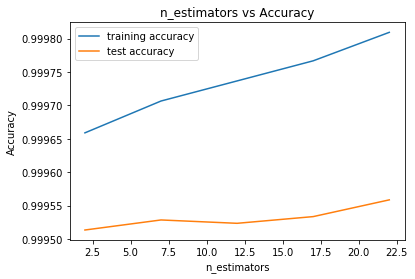

In [153]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

In [154]:
param_grid = {
    'max_depth': range(5, 30, 5),
    'n_estimators': range(2, 25, 5)
}
# Create a based model
xgboost = XGBClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Optimal Accuracy Score:

In [155]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9995535804359236


##### Optimal Hyperparameters:

In [156]:
grid_search.best_params_

{'n_estimators': 22, 'max_depth': 20}

In [157]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=22, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Running the model with best parameters obtained from grid search:

In [158]:
# model with the best hyperparameters
from xgboost import XGBClassifier
xgb_final = XGBClassifier(   max_depth=15,
                             n_estimators=22, 
                             random_state=100,
                             n_jobs=-1)
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=22, n_jobs=-1, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [159]:
y_pred_train_xgb_final = xgb_final.predict(X_train)

##### Getting Classification Report for Training:

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_train, y_pred_train_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      0.91      0.95       350

    accuracy                           1.00    199364
   macro avg       1.00      0.95      0.98    199364
weighted avg       1.00      1.00      1.00    199364



##### Confusion Matrix for training:

In [161]:
confusion_train_xgb_final = confusion_matrix(y_train, y_pred_train_xgb_final)
confusion_train_xgb_final

array([[199014,      0],
       [    33,    317]], dtype=int64)

##### Checking Training Accuracy:

In [162]:
print("Accuracy_Score: {}".format(xgb_final.score(X_train, y_train)))

Accuracy_Score: 0.9998344736261311


##### Other Training Metrics:

In [163]:
TP = confusion_train_xgb_final[1,1] # true positive 
TN = confusion_train_xgb_final[0,0] # true negatives
FP = confusion_train_xgb_final[0,1] # false positives
FN = confusion_train_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_train, y_train)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train_xgb_final)

#Metrics Dataframe
metrics_xgb_final_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_train = metrics_xgb_final_train.T.rename(columns={0: 'Metrics_Training'})
metrics_xgb_final_train

,Metrics_Training
Accuracy,0.999834
Sensitivity,0.905714
Specificity,1.000000
True Positive Rate,0.905714
False Positive Rate,0.000000
Positive Predictive Value,1.000000
Negative Predictive Value,0.999834
Misclassification Rate,0.000166
Precision,1.000000
Recall,0.905714


##### Making prediction on Test:

In [164]:
y_pred_test_xgb_final = xgb_final.predict(X_test)

##### Getting Classification Report for Test:

In [165]:
print(classification_report(y_test, y_pred_test_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.91      0.76      0.83       142

    accuracy                           1.00     85443
   macro avg       0.95      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [166]:
confusion_test_xgb_final = confusion_matrix(y_test, y_pred_test_xgb_final)
confusion_test_xgb_final

array([[85290,    11],
       [   34,   108]], dtype=int64)

##### Checking Test Accuracy:

In [167]:
print("Accuracy_Score: {}".format(xgb_final.score(X_test, y_test)))

Accuracy_Score: 0.9994733330992591


##### Other Test Metrics:

In [168]:
TP = confusion_test_xgb_final[1,1] # true positive 
TN = confusion_test_xgb_final[0,0] # true negatives
FP = confusion_test_xgb_final[0,1] # false positives
FN = confusion_test_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb_final)

#Metrics Dataframe
metrics_xgb_final_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_test = metrics_xgb_final_test.T.rename(columns={0: 'Metrics_Test'})
metrics_xgb_final_test = pd.concat([metrics_xgb_final_train, metrics_xgb_final_test], axis=1)
round(metrics_xgb_final_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,1.00,1.00
Sensitivity,0.91,0.76
Specificity,1.00,1.00
True Positive Rate,0.91,0.76
False Positive Rate,0.00,0.00
Positive Predictive Value,1.00,0.91
Negative Predictive Value,1.00,1.00
Misclassification Rate,0.00,0.00
Precision,1.00,0.91
Recall,0.91,0.76


# Handling Data Imbalancing:
We are going to use below 3 methods to handle data imbalance:
- Random Oversampling
- Synthetic Minority Over-sampling Technique (SMOTE)
- ADASYN

We'll build below 4 models for each of the Imbalancing Methods:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

### Train-Test Split (Using Startified Split):

In [169]:
y = data['Class']
X = data.drop(columns=['Class'])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify=y, random_state=100)

## Method 1: Random Oversampling

##### Importing Library:

In [171]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [172]:
random_os = RandomOverSampler(sampling_strategy='auto', random_state=100)
X_random_os, y_random_os = random_os.fit_resample(X_train, y_train)

##### Plotting Class Distribution after Random Oversampling:

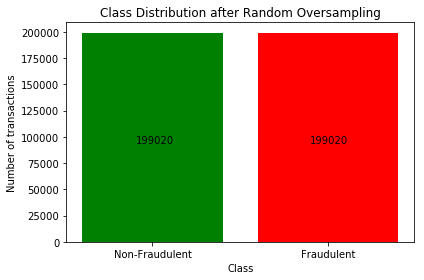

In [173]:
plt.bar(['Non-Fraudulent','Fraudulent'], [Counter(y_random_os)[0], Counter(y_random_os)[1]], color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_random_os)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_random_os)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.title("Class Distribution after Random Oversampling")
plt.tight_layout()
plt.show()

## <center><u>Model 1: Logistic Regression

In [580]:
logreg = LogisticRegression()
model = logreg.fit(X_random_os, y_random_os)

In [581]:
model.coef_

array([[ 0.21559654, -0.37497902,  0.00382158,  1.09051411,  0.09021912,
        -0.06243931,  0.29177504, -0.70685565, -0.26101725, -1.00158878,
         0.55909743, -0.98966892, -0.19213632, -1.29245738, -0.04071728,
        -0.69735932, -0.71012597, -0.13277848,  0.03862523,  0.10969358,
         0.27585904,  0.38790089, -0.45709886,  0.21796885, -0.28980906,
        -0.0122218 ,  0.22073958,  0.16709834, -0.00138757]])

##### Getting predicted values on the training set:

In [582]:
y_random_os_pred = model.predict_proba(X_random_os)[:,1]
y_random_os_pred[:10]

array([0.02549024, 0.05291525, 0.03256841, 0.01413225, 0.21692467,
       0.00498358, 0.00645336, 0.03418379, 0.22930437, 0.0093103 ])

##### Reshaping the predicted values:

In [583]:
y_random_os_pred = y_random_os_pred.reshape(-1)

##### Resetting index of y_random_os:

In [584]:
y_random_os.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Class", "Class_Prob":

In [585]:
y_random_os_pred_final = pd.DataFrame({'Class':y_random_os.values, 'Class_Prob':y_random_os_pred})
y_random_os_pred_final.head()

,Class,Class_Prob
0,0,0.025490
1,0,0.052915
2,0,0.032568
3,0,0.014132
4,0,0.216925


##### Selecting a threshold value for the column "Class_Prob" as 0.5 and creating a column "Predicted Class" in the Dataframe which shows the value as 1 if Class_Prob is geater than 0.5, else shows the value as 0:

In [586]:
y_random_os_pred_final['Predicted Class'] = y_random_os_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_random_os_pred_final.head()

,Class,Class_Prob,Predicted Class
0,0,0.025490,0
1,0,0.052915,0
2,0,0.032568,0
3,0,0.014132,0
4,0,0.216925,0


##### Confusion Matix:

In [587]:
confusion_train = metrics.confusion_matrix(y_random_os_pred_final['Class'], y_random_os_pred_final['Predicted Class'])
print(confusion_train)

[[194053   4967]
 [ 13851 185169]]


##### Checking Accuracy:

In [588]:
print("Accuracy: {}".format(metrics.accuracy_score(y_random_os_pred_final['Class'], y_random_os_pred_final['Predicted Class'])))

Accuracy: 0.9527233443874987


##### Metrics other than Accuracy in Traing Data Set:

In [589]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.930404
Specificity,0.975043
False Positive Rate,0.024957
Positive Predictive Value,0.973877
Negative Predictive Value,0.933378


### Plotting ROC Curve for Training Data:

In [590]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [591]:
fpr, tpr, thresholds = metrics.roc_curve(y_random_os_pred_final['Class'], y_random_os_pred_final['Class_Prob'], drop_intermediate = False )

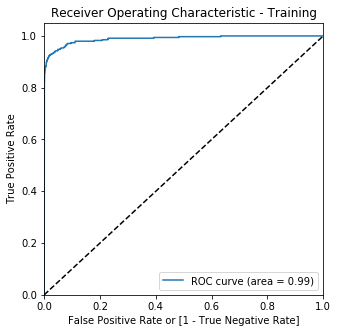

In [592]:
roc_curve(y_random_os_pred_final['Class'], y_random_os_pred_final['Class_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [593]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_random_os_pred_final[i]= y_random_os_pred_final['Class_Prob'].map(lambda x: 1 if x > i else 0)
y_random_os_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.025490,0,1,0,0,0,0,0,0,0,0,0
1,0,0.052915,0,1,0,0,0,0,0,0,0,0,0
2,0,0.032568,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014132,0,1,0,0,0,0,0,0,0,0,0
4,0,0.216925,0,1,1,1,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [594]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_random_os_pred_final['Class'], y_random_os_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.902942,0.979635,0.826249
0.2,0.2,0.940614,0.970892,0.910336
0.3,0.3,0.947005,0.948055,0.945955
0.4,0.4,0.950756,0.936423,0.965089
0.5,0.5,0.952723,0.930404,0.975043
0.6,0.6,0.951980,0.922038,0.981921
0.7,0.7,0.949251,0.910793,0.987710
0.8,0.8,0.944051,0.896433,0.991669
0.9,0.9,0.937348,0.879077,0.995619


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

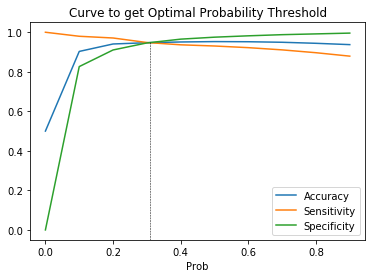

In [599]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.31, ymax= 0.91, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='best')
plt.show()

**From the above curve , 0.31 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.31:

In [600]:
y_random_os_pred_final['Final_Predicted'] = y_random_os_pred_final['Class_Prob'].map( lambda x: 1 if x > 0.31 else 0)
y_random_os_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.025490,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.052915,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.032568,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.014132,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.216925,0,1,1,1,0,0,0,0,0,0,0,0


##### Checking Accuracy:

In [601]:
accuracy = metrics.accuracy_score(y_random_os_pred_final['Class'], y_random_os_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9482388704652799


##### New Confusion matrix fo training:

In [602]:
confusion_new = metrics.confusion_matrix(y_random_os_pred_final['Class'], y_random_os_pred_final['Final_Predicted'])
confusion_new

array([[188755,  10265],
       [ 10338, 188682]], dtype=int64)

##### Other Train Metrics:

In [603]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_random_os_pred_final['Class'], y_random_os_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_random_os_pred)


# Metrics Dataframe
metrics_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train = metrics_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train, 4)

,Metrics_Training
Accuracy,0.9482
Sensitivity,0.9481
Specificity,0.9484
True Positive Rate,0.9481
False Positive Rate,0.0516
Positive Predictive Value,0.9484
Negative Predictive Value,0.9481
Misclassification Rate,0.0518
Precision,0.9484
Recall,0.9481


### Making Prediction on Test Set:

In [604]:
y_test_pred = model.predict_proba(X_test)[:,1]
y_test_pred[:10]

array([0.63808066, 0.72679994, 0.04350597, 0.02539842, 0.04820761,
       0.04953397, 0.00949472, 0.0358157 , 0.00884332, 0.00599029])

##### Reshaping predicted values, resetting index of y_test and creating a Dataframe with "Class" and "Class_Prob" columns for Test set:

In [605]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.638081
1,0,0.726800
2,0,0.043506
3,0,0.025398
4,0,0.048208


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.31:

In [606]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.31 else 0)
y_test_pred_final.head()

,Class,Class_Prob,Final_Predicted
0,0,0.638081,1
1,0,0.726800,1
2,0,0.043506,0
3,0,0.025398,0
4,0,0.048208,0


### Plotting the ROC Curve for Test Data:

In [607]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [608]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'], drop_intermediate = False )

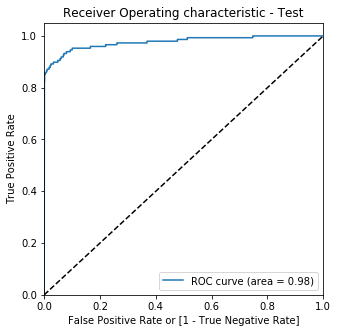

In [609]:
roc_curve_test(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])

In [610]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.9491356810973397


##### Confusion Matrix for Test data:

In [611]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[80963  4332]
 [   14   134]]


##### Other Test Metrics:

In [612]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test = metrics_test.T.rename(columns={0: 'Metrics_Test'})
metrics_test = pd.concat([metrics_train, metrics_test], axis=1)
round(metrics_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9482,0.9491
Sensitivity,0.9481,0.9054
Specificity,0.9484,0.9492
True Positive Rate,0.9481,0.9054
False Positive Rate,0.0516,0.0508
Positive Predictive Value,0.9484,0.0300
Negative Predictive Value,0.9481,0.9998
Misclassification Rate,0.0518,0.0509
Precision,0.9484,0.0300
Recall,0.9481,0.9054


## <center><u>Model 2: Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_initial = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_initial.fit(X_random_os, y_random_os)

DecisionTreeClassifier(max_depth=5, random_state=100)

##### Getting predicted values on the training set:

In [204]:
y_pred_train = dt_initial.predict(X_random_os)

##### Checking Classification Report:

In [205]:
print(classification_report(y_random_os, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    199020
           1       0.97      0.97      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040



##### Confusion Matrix for Training: 

In [206]:
confusion_train = confusion_matrix(y_random_os, y_pred_train)
confusion_train

array([[193964,   5056],
       [  5216, 193804]], dtype=int64)

##### Checking Train Accuracy:

In [207]:
print("Accuracy: {}".format(accuracy_score(y_random_os, y_pred_train)))

Accuracy: 0.9741935483870968


##### Other Train Metrics:

In [208]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_random_os, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train)

# Metrics Dataframe:
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9742
Sensitivity,0.9738
Specificity,0.9746
True Positive Rate,0.9738
False Positive Rate,0.0254
Positive Predictive Value,0.9746
Negative Predictive Value,0.9738
Misclassification Rate,0.0258
Precision,0.9746
Recall,0.9738


##### Getting Predicted value on Test set:

In [209]:
y_pred_test = dt_initial.predict(X_test)

##### Confusion Matrix for Test:

In [210]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[83115,  2180],
       [   22,   126]], dtype=int64)

##### Checking Test Accuracy:

In [211]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy: 0.9742284329904146


##### Other Test Metrics:

In [212]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)
#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9742,0.9742
Sensitivity,0.9738,0.8514
Specificity,0.9746,0.9744
True Positive Rate,0.9738,0.8514
False Positive Rate,0.0254,0.0256
Positive Predictive Value,0.9746,0.0546
Negative Predictive Value,0.9738,0.9997
Misclassification Rate,0.0258,0.0258
Precision,0.9746,0.0546
Recall,0.9738,0.8514


Let's tune the hyperparameter to get optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [213]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   44.0s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [214]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.385780,0.038904,0.046865,6.743496e-07,2,{'max_depth': 2},0.926236,0.926432,0.929409,0.927359,0.001452,6,0.926202,0.926119,0.929707,0.927343,0.001672
1,8.662506,0.329778,0.046863,1.697076e-06,7,{'max_depth': 7},0.987911,0.986207,0.989456,0.987858,0.001327,5,0.987873,0.986961,0.989392,0.988075,0.001003
2,9.852981,0.160296,0.057278,7.364628e-03,12,{'max_depth': 12},0.998711,0.998907,0.999126,0.998915,0.000169,4,0.998847,0.999118,0.999284,0.999083,0.000180
3,10.932024,0.055932,0.067695,7.363504e-03,17,{'max_depth': 17},0.999585,0.999382,0.999359,0.999442,0.000102,3,0.999710,0.999736,0.999616,0.999687,0.000052
4,11.411904,0.186367,0.067694,7.361762e-03,22,{'max_depth': 22},0.999585,0.999555,0.999706,0.999616,0.000065,2,0.999845,0.999928,0.999974,0.999916,0.000053


##### Plotting Accuracies with max_depth:

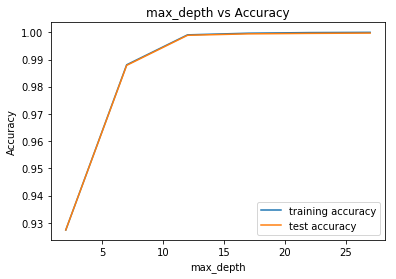

In [215]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both training and test score increase. After the value 12, the test score gradually reduces and train score increases. The model overfits the data at high value of max_depth.

#### (ii) min_samples_leaf Tuning:

In [216]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [217]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.893658,0.230363,0.062878,5.533060e-04,5,{'min_samples_leaf': 5},0.999668,0.999548,0.999593,0.999603,0.000050,1,0.999845,0.999857,0.999797,0.999833,0.000026
1,10.322840,0.285900,0.062905,1.276718e-02,25,{'min_samples_leaf': 25},0.998892,0.998885,0.999073,0.998950,0.000087,2,0.999152,0.999103,0.999273,0.999176,0.000071
2,10.019638,0.229197,0.057279,7.362212e-03,45,{'min_samples_leaf': 45},0.998508,0.998425,0.998485,0.998473,0.000035,3,0.998560,0.998658,0.998764,0.998661,0.000083
3,9.764428,0.280704,0.062487,9.798072e-07,65,{'min_samples_leaf': 65},0.997784,0.997882,0.997279,0.997648,0.000264,4,0.997784,0.998055,0.997724,0.997854,0.000144
4,10.628574,0.274010,0.052072,7.365021e-03,85,{'min_samples_leaf': 85},0.996948,0.997483,0.997068,0.997166,0.000229,5,0.996993,0.997728,0.997434,0.997385,0.000302


##### Plotting Accuracies with min_samples_leaf:

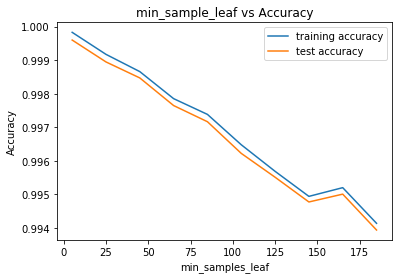

In [218]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_sample_leaf vs Accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf, the tree shows overfitting. After the value 160, the model becomes more stable and performs well.

#### (iii) min_samples_split Tuning:

In [219]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV :

In [220]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,11.963710,0.127771,0.072899,7.359346e-03,5,{'min_samples_split': 5},0.999706,0.999714,0.999736,0.999719,0.000013,1,1.0,1.0,1.0,1.0,0.0
1,11.646564,0.240414,0.062483,1.275542e-02,25,{'min_samples_split': 25},0.999706,0.999714,0.999736,0.999719,0.000013,1,1.0,1.0,1.0,1.0,0.0
2,11.625424,0.250623,0.062486,9.733398e-07,45,{'min_samples_split': 45},0.999706,0.999714,0.999736,0.999719,0.000013,1,1.0,1.0,1.0,1.0,0.0
3,11.765940,0.115975,0.062486,5.150430e-07,65,{'min_samples_split': 65},0.999706,0.999714,0.999736,0.999719,0.000013,1,1.0,1.0,1.0,1.0,0.0
4,11.401395,0.121995,0.057279,7.364347e-03,85,{'min_samples_split': 85},0.999706,0.999714,0.999736,0.999719,0.000013,1,1.0,1.0,1.0,1.0,0.0


##### Plotting Accuracies with min_samples_split:

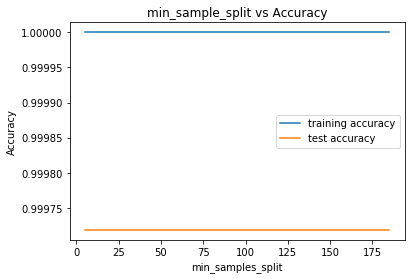

In [221]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_sample_split vs Accuracy")
plt.legend()
plt.show()

This shows that Train and Test accuracy are constant.

##### Randomized Search to Find Optimal Hyperparameters:

In [222]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 200, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the Randomized search model
dtree = DecisionTreeClassifier(random_state = 100)
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, scoring="accuracy", verbose = 1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 30, 5),
                                        'min_samples_leaf': range(50, 200, 50),
                                        'min_samples_split': range(50, 200, 50)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Cross Validation results:

In [223]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,12.877003,0.066786,0.057277,0.007362,50,100,20,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.996669,0.996902,0.996654,0.996742,0.000114,4,0.996431,0.997177,0.996661,0.996757,0.000312
1,9.428521,0.290542,0.052071,0.007364,100,100,25,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.996774,0.996985,0.996194,0.996651,0.000335,7,0.996763,0.997257,0.996612,0.996877,0.000275
2,9.785709,0.123872,0.052070,0.007363,50,150,5,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.972460,0.972739,0.973560,0.972920,0.000467,10,0.972645,0.972479,0.973975,0.973033,0.000670
3,9.117980,0.111194,0.052072,0.007365,150,100,10,gini,"{'min_samples_split': 150, 'min_samples_leaf':...",0.992998,0.995847,0.995689,0.994845,0.001307,8,0.992904,0.995972,0.996164,0.995013,0.001493
4,12.386513,0.199224,0.057279,0.007365,150,150,10,entropy,"{'min_samples_split': 150, 'min_samples_leaf':...",0.994604,0.994438,0.994724,0.994588,0.000117,9,0.994475,0.994728,0.994803,0.994669,0.000140


##### Getting best parameters:

In [224]:
grid_search.best_params_

{'min_samples_split': 150,
 'min_samples_leaf': 50,
 'max_depth': 15,
 'criterion': 'entropy'}

##### Printing the optimal accuracy score and hyperparameters:

In [225]:
print("Best Accuracy: {}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

Best Accuracy: 0.9986031554617627
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=150, random_state=100)


##### Running the model with best parameters obtained from grid search:

In [226]:
# Model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=20,
                                  min_samples_leaf=50,
                                  min_samples_split=150)
dt_final.fit(X_random_os, y_random_os)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50, min_samples_split=150,
                       random_state=100)

##### Getting predicted values on Training set:

In [227]:
y_pred_train_dt = dt_final.predict(X_random_os)

##### Checking Classification Report for training:

In [228]:
print(classification_report(y_random_os, y_pred_train_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [229]:
confusion_train = confusion_matrix(y_random_os, y_pred_train_dt)
confusion_train

array([[198483,    537],
       [     0, 199020]], dtype=int64)

##### Accuracy Score for training:

In [230]:
print("Accuracy_Score: {}".format(dt_final.score(X_random_os, y_random_os)))

Accuracy_Score: 0.9986508893578535


##### Other Training Metrics:

In [231]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

accuracy = dt_final.score(X_random_os, y_random_os)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train_dt)

# Metrics Dataframe
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9987
Sensitivity,1.0000
Specificity,0.9973
True Positive Rate,1.0000
False Positive Rate,0.0027
Positive Predictive Value,0.9973
Negative Predictive Value,1.0000
Misclassification Rate,0.0013
Precision,0.9973
Recall,1.0000


##### Making prediction on Test set:

In [232]:
y_pred_test_dt = dt_final.predict(X_test)

##### Checking Classification Report for test:

In [233]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.33      0.83      0.47       148

    accuracy                           1.00     85443
   macro avg       0.66      0.91      0.73     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for test:

In [234]:
confusion_test = confusion_matrix(y_test, y_pred_test_dt)
confusion_test

array([[85041,   254],
       [   25,   123]], dtype=int64)

##### Accuracy Score for test:

In [235]:
print("Accuracy_Score: {}".format(dt_final.score(X_test, y_test)))

Accuracy_Score: 0.9967346652154068


##### Other Test Metrics:

In [236]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = dt_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9987,0.9967
Sensitivity,1.0000,0.8311
Specificity,0.9973,0.9970
True Positive Rate,1.0000,0.8311
False Positive Rate,0.0027,0.0030
Positive Predictive Value,0.9973,0.3263
Negative Predictive Value,1.0000,0.9997
Misclassification Rate,0.0013,0.0033
Precision,0.9973,0.3263
Recall,1.0000,0.8311


## <Center><u>Model 3: Random Forest<Center><u>

In [237]:
from sklearn.ensemble import RandomForestClassifier
rfc_initial = RandomForestClassifier(random_state=100, n_jobs=-1)
rfc_initial.fit(X_random_os, y_random_os)

RandomForestClassifier(n_jobs=-1, random_state=100)

##### Getting predicted values on Training set:

In [238]:
y_pred_train = rfc_initial.predict(X_random_os)

##### Confusion Matrix:

In [239]:
confusion_train = confusion_matrix(y_random_os, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [240]:
print("Accuracy_Score: {}".format(accuracy_score(y_random_os, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [241]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_random_os, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 2)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [242]:
y_pred_test = rfc_initial.predict(X_test)

##### Confusion Matrix for Test:

In [243]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85286,     9],
       [   33,   115]], dtype=int64)

##### Checking Test Accuracy:

In [244]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9995084442259752


##### Other Test Metrics:

In [245]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9995
Sensitivity,1.0,0.7770
Specificity,1.0,0.9999
True Positive Rate,1.0,0.7770
False Positive Rate,0.0,0.0001
Positive Predictive Value,1.0,0.9274
Negative Predictive Value,1.0,0.9996
Misclassification Rate,0.0,0.0005
Precision,1.0,0.9274
Recall,1.0,0.7770


Let's tune hyperparameters to het optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `n_estimators`, `max_features`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [246]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [247]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,42.161046,0.401100,1.877430,0.060461,2,{'max_depth': 2},0.935868,0.936645,0.934655,0.935723,0.000819,6,0.936320,0.936219,0.934806,0.935782,0.000691
1,114.262594,2.373253,3.396734,0.500800,7,{'max_depth': 7},0.984579,0.986019,0.986494,0.985697,0.000814,5,0.984971,0.986245,0.986045,0.985754,0.000559
2,155.781387,1.656162,4.514966,0.148329,12,{'max_depth': 12},0.999834,0.999759,0.999849,0.999814,0.000040,4,0.999861,0.999853,0.999845,0.999853,0.000006
3,165.816619,2.232811,4.389176,0.362641,17,{'max_depth': 17},0.999925,0.999910,0.999917,0.999917,0.000006,3,0.999974,0.999989,0.999970,0.999977,0.000008
4,168.742472,2.771216,4.566617,0.178997,22,{'max_depth': 22},0.999970,0.999940,0.999962,0.999957,0.000013,1,1.000000,1.000000,1.000000,1.000000,0.000000


##### Plotting Accuracies with max_depth:

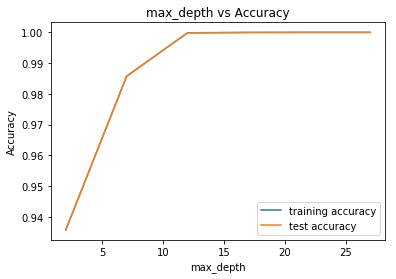

In [248]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores gradually increase till a point, but after that test score starts to decrease.

#### (ii) n_estimators Tuning:

In [249]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(50, 800, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1, random_state=100)
rf.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 27.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'n_estimators': range(50, 800, 200)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [250]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,75.179123,0.013955,1.446042,0.060967,50,{'n_estimators': 50},0.996654,0.993910,0.994046,0.994870,0.001263,3,0.996902,0.993888,0.993767,0.994852,0.001450
1,368.548055,0.952998,6.954664,0.549467,250,{'n_estimators': 250},0.993481,0.995350,0.995508,0.994779,0.000921,4,0.994019,0.995346,0.995222,0.994862,0.000598
2,659.878775,2.881978,12.100026,0.166459,450,{'n_estimators': 450},0.995093,0.995350,0.995516,0.995320,0.000174,1,0.995459,0.995335,0.995233,0.995342,0.000092
3,728.790617,147.066750,7.777854,3.232825,650,{'n_estimators': 650},0.995078,0.995342,0.995523,0.995315,0.000183,2,0.995459,0.995323,0.995229,0.995337,0.000094


##### Plotting Accuracies with n_estimators:

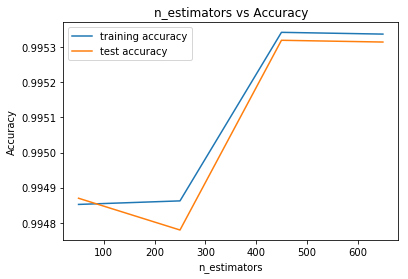

In [251]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

#### (iii) max_features Tuning:

In [252]:
# RandomizedSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose = 1, random_state=100, n_jobs=-1, return_train_score=True)
rf.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 11.6min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1, param_distributions={'max_features': [4, 8, 24]},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [253]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,118.900080,2.897123,3.205956,0.955297,4,{'max_features': 4},0.993533,0.995335,0.995357,0.994742,0.000855,3,0.994050,0.995335,0.995240,0.994875,0.000585
1,220.694192,2.034637,3.950710,0.514028,8,{'max_features': 8},0.994988,0.998131,0.996963,0.996694,0.001297,2,0.995433,0.998263,0.996650,0.996782,0.001159
2,411.473707,54.872993,1.616143,0.875242,24,{'max_features': 24},0.999472,0.999201,0.999126,0.999266,0.000149,1,0.999536,0.999408,0.999337,0.999427,0.000083


##### Plotting Accuracies with max_features:

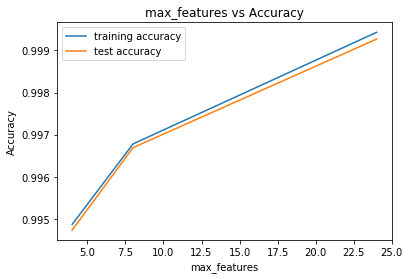

In [254]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("max_features vs Accuracy")
plt.legend()
plt.show()

#### (iv) min_samples_leaf Tuning:

In [255]:
# RandomizedSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(100, 400, 100)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [256]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,155.726687,1.239045,3.117046,0.413124,100,{'min_samples_leaf': 100},0.999495,0.999359,0.999352,0.999402,0.000066,1,0.999438,0.999454,0.999416,0.999436,0.000015
1,155.416751,2.487504,3.526684,0.503661,200,{'min_samples_leaf': 200},0.999103,0.999088,0.999148,0.999113,0.000026,2,0.999062,0.999190,0.999209,0.999153,0.000065
2,116.019832,50.686660,1.674557,0.718637,300,{'min_samples_leaf': 300},0.998666,0.998741,0.998651,0.998686,0.000040,3,0.998613,0.998802,0.998768,0.998728,0.000082


##### Plotting Accuracies with min_samples_leaf:

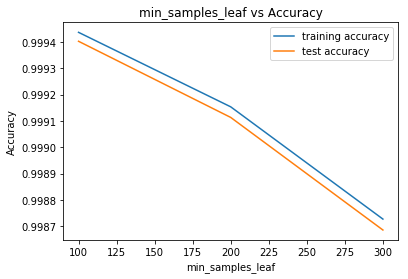

In [257]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_samples_leaf vs Accuracy")
plt.legend()
plt.show()

#### (v) min_samples_split Tuning:

In [258]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.3min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(200, 500, 50)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [259]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,174.122239,1.921442,1.532603,0.337849,200,{'min_samples_split': 200},0.999473,0.999157,0.999308,0.999313,0.000129,1,0.999308,0.999406,0.999376,0.999363,0.000041
1,172.874416,1.027049,1.756953,0.036592,250,{'min_samples_split': 250},0.999473,0.999142,0.999248,0.999288,0.000138,4,0.999315,0.999406,0.999338,0.999353,0.000038
2,173.157279,1.112616,1.883668,0.648051,300,{'min_samples_split': 300},0.999458,0.999157,0.999278,0.999298,0.000124,2,0.999330,0.999413,0.999330,0.999358,0.000039
3,173.392314,0.859520,2.298868,0.608534,350,{'min_samples_split': 350},0.999473,0.999157,0.999248,0.999293,0.000133,3,0.999323,0.999413,0.999330,0.999355,0.000041
4,172.133762,1.193534,2.012332,0.467682,400,{'min_samples_split': 400},0.999458,0.999157,0.999248,0.999288,0.000126,4,0.999323,0.999413,0.999308,0.999348,0.000047


##### Plotting Accuracies with min_samples_split:

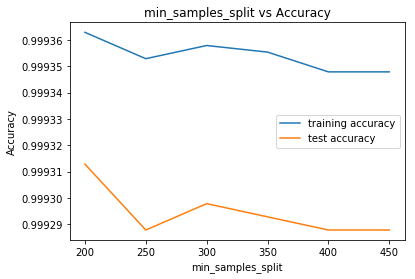

In [260]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_samples_split vs Accuracy")
plt.legend()
plt.show()

##### Randomized Search to Find Optimal Hyperparameters:

In [261]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True,)
# Fit the grid search to the data
grid_search.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 43.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 300, 200),
                                        'min_samples_split': range(200, 400, 200),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, verbose=1)

##### Optimal Accuracy Score:

In [262]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9976409406089841


##### Optimal Hyperparameters:

In [263]:
grid_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 200,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 10}

In [264]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)

##### Running the model with best parameters obtained from grid search:

In [265]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100, random_state=100,
                             n_jobs=-1)
rfc_final.fit(X_random_os, y_random_os)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_jobs=-1, random_state=100)

##### Getting predicted values on Training set:

In [266]:
y_pred_train_rf = rfc_final.predict(X_random_os)

##### Getting Classification Report for Training:

In [267]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_random_os, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    199020
           1       1.00      0.99      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [268]:
confusion_train_rf = confusion_matrix(y_random_os, y_pred_train_rf)
confusion_train_rf

array([[198769,    251],
       [  1173, 197847]], dtype=int64)

##### Checking Training Accuracy:

In [269]:
print("Accuracy_Score: {}".format(rfc_final.score(X_random_os, y_random_os)))

Accuracy_Score: 0.9964224701035072


##### Other Training Metrics:

In [270]:
TP = confusion_train_rf[1,1] # true positive 
TN = confusion_train_rf[0,0] # true negatives
FP = confusion_train_rf[0,1] # false positives
FN = confusion_train_rf[1,0] # false negatives

accuracy = rfc_final.score(X_random_os, y_random_os)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train_rf)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,0.9964
Sensitivity,0.9941
Specificity,0.9987
True Positive Rate,0.9941
False Positive Rate,0.0013
Positive Predictive Value,0.9987
Negative Predictive Value,0.9941
Misclassification Rate,0.0036
Precision,0.9987
Recall,0.9941


##### Making prediction on Test:

In [271]:
y_pred_test_rf = rfc_final.predict(X_test)

##### Getting Classification Report for Test:

In [272]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.48      0.84      0.61       148

    accuracy                           1.00     85443
   macro avg       0.74      0.92      0.81     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [273]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)
confusion_test_rf

array([[85160,   135],
       [   23,   125]], dtype=int64)

##### Checking Test Accuracy:

In [274]:
print("Accuracy_Score: {}".format(rfc_final.score(X_test, y_test)))

Accuracy_Score: 0.9981508139929544


##### Other Test Metrics:

In [275]:
TP = confusion_test_rf[1,1] # true positive 
TN = confusion_test_rf[0,0] # true negatives
FP = confusion_test_rf[0,1] # false positives
FN = confusion_test_rf[1,0] # false negatives

accuracy = rfc_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9964,0.9982
Sensitivity,0.9941,0.8446
Specificity,0.9987,0.9984
True Positive Rate,0.9941,0.8446
False Positive Rate,0.0013,0.0016
Positive Predictive Value,0.9987,0.4808
Negative Predictive Value,0.9941,0.9997
Misclassification Rate,0.0036,0.0018
Precision,0.9987,0.4808
Recall,0.9941,0.8446


## <center><u> Model 4: XGBoost

In [276]:
from xgboost import XGBClassifier
xgb_initial = XGBClassifier(random_state=100, n_jobs=-1)
xgb_initial.fit(X_random_os, y_random_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

##### Getting predicted values on Training set:

In [277]:
y_pred_train = xgb_initial.predict(X_random_os)

##### Confusion Matrix:

In [278]:
confusion_train = confusion_matrix(y_random_os, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [279]:
print("Accuracy_Score: {}".format(accuracy_score(y_random_os, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [280]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_random_os, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [281]:
y_pred_test = xgb_initial.predict(X_test)

##### Confusion Matrix for Test:

In [282]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85281,    14],
       [   25,   123]], dtype=int64)

##### Checking Test Accuracy:

In [283]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9995435553526912


##### Other Test Metrics:

In [284]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9995
Sensitivity,1.0,0.8311
Specificity,1.0,0.9998
True Positive Rate,1.0,0.8311
False Positive Rate,0.0,0.0002
Positive Predictive Value,1.0,0.8978
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0005
Precision,1.0,0.8978
Recall,1.0,0.8311


## Hyperparameter Optimization:
We are going to tune the features `max_depth` and `n_estimators`:

#### (i) max_depth Tuning:

In [285]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 30, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 18.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Scores of GridSearch CV:

In [286]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,220.389035,0.233844,1.260699,0.004175,5,{'max_depth': 5},0.999947,0.999864,0.999955,0.999922,0.000041,1,1.0,1.0,1.0,1.0,0.0
1,292.718510,6.254105,1.421034,0.058673,10,{'max_depth': 10},0.999925,0.999857,0.999940,0.999907,0.000036,2,1.0,1.0,1.0,1.0,0.0
2,320.559934,5.066672,1.454853,0.076941,15,{'max_depth': 15},0.999940,0.999842,0.999932,0.999905,0.000045,4,1.0,1.0,1.0,1.0,0.0
3,324.461633,4.369827,1.380021,0.070192,20,{'max_depth': 20},0.999917,0.999849,0.999932,0.999900,0.000036,5,1.0,1.0,1.0,1.0,0.0
4,260.689289,5.754908,0.970166,0.123472,25,{'max_depth': 25},0.999917,0.999849,0.999955,0.999907,0.000044,2,1.0,1.0,1.0,1.0,0.0


##### Plotting Accuracies with max_depth:

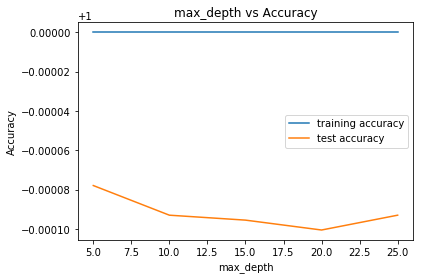

In [287]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

#### (ii) n_estimators Tuning:

In [288]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(2, 25, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

In [289]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.505124,0.009042,0.292261,0.006323,2,{'n_estimators': 2},0.987609,0.987639,0.990315,0.988521,0.001268,5,0.988031,0.988201,0.990251,0.988828,0.001009
1,20.289468,0.140526,0.313456,0.011694,7,{'n_estimators': 7},0.997038,0.998515,0.998696,0.998083,0.000743,4,0.997332,0.998636,0.998873,0.998280,0.000678
2,32.661161,0.092505,0.354528,0.031524,12,{'n_estimators': 12},0.999163,0.999088,0.999216,0.999156,0.000053,3,0.999378,0.999371,0.999318,0.999356,0.000027
3,45.639222,0.391692,0.385331,0.007362,17,{'n_estimators': 17},0.999472,0.999503,0.999510,0.999495,0.000016,2,0.999582,0.999631,0.999570,0.999594,0.000026
4,48.631526,5.389731,0.298737,0.059020,22,{'n_estimators': 22},0.999638,0.999623,0.999608,0.999623,0.000012,1,0.999751,0.999793,0.999706,0.999750,0.000035


##### Plotting Accuracies with n_estimators:

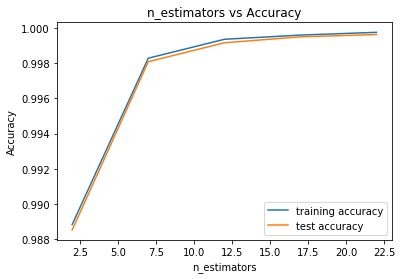

In [290]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

In [291]:
param_grid = {
    'max_depth': range(5, 30, 5),
    'n_estimators': range(2, 25, 5)
}
# Create a based model
xgboost = XGBClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_random_os, y_random_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Optimal Accuracy Score:

In [292]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9997939905537132


##### Optimal Hyperparameters:

In [293]:
grid_search.best_params_

{'n_estimators': 22, 'max_depth': 20}

In [294]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=22, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Running the model with best parameters obtained from grid search:

In [295]:
# model with the best hyperparameters
from xgboost import XGBClassifier
xgb_final = XGBClassifier(   max_depth=15,
                             n_estimators=22, 
                             random_state=100,
                             n_jobs=-1)
xgb_final.fit(X_random_os, y_random_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=22, n_jobs=-1, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [296]:
y_pred_train_xgb_final = xgb_final.predict(X_random_os)

##### Getting Classification Report for Training:

In [297]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_random_os, y_pred_train_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [298]:
confusion_train_xgb_final = confusion_matrix(y_random_os, y_pred_train_xgb_final)
confusion_train_xgb_final

array([[199002,     18],
       [     0, 199020]], dtype=int64)

##### Checking Training Accuracy:

In [299]:
print("Accuracy_Score: {}".format(xgb_final.score(X_random_os, y_random_os)))

Accuracy_Score: 0.9999547784142298


##### Other Training Metrics:

In [300]:
TP = confusion_train_xgb_final[1,1] # true positive 
TN = confusion_train_xgb_final[0,0] # true negatives
FP = confusion_train_xgb_final[0,1] # false positives
FN = confusion_train_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_random_os, y_random_os)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_random_os, y_pred_train_xgb_final)

#Metrics Dataframe
metrics_xgb_final_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_train = metrics_xgb_final_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_xgb_final_train, 4)

,Metrics_Training
Accuracy,1.0000
Sensitivity,1.0000
Specificity,0.9999
True Positive Rate,1.0000
False Positive Rate,0.0001
Positive Predictive Value,0.9999
Negative Predictive Value,1.0000
Misclassification Rate,0.0000
Precision,0.9999
Recall,1.0000


##### Making prediction on Test:

In [301]:
y_pred_test_xgb_final = xgb_final.predict(X_test)

##### Getting Classification Report for Test:

In [302]:
print(classification_report(y_test, y_pred_test_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.81      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [303]:
confusion_test_xgb_final = confusion_matrix(y_test, y_pred_test_xgb_final)
confusion_test_xgb_final

array([[85270,    25],
       [   28,   120]], dtype=int64)

##### Checking Test Accuracy:

In [304]:
print("Accuracy_Score: {}".format(xgb_final.score(X_test, y_test)))

Accuracy_Score: 0.9993797034280163


##### Other Test Metrics:

In [305]:
TP = confusion_test_xgb_final[1,1] # true positive 
TN = confusion_test_xgb_final[0,0] # true negatives
FP = confusion_test_xgb_final[0,1] # false positives
FN = confusion_test_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb_final)

#Metrics Dataframe
metrics_xgb_final_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_test = metrics_xgb_final_test.T.rename(columns={0: 'Metrics_Test'})
metrics_xgb_final_test = pd.concat([metrics_xgb_final_train, metrics_xgb_final_test], axis=1)
round(metrics_xgb_final_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0000,0.9994
Sensitivity,1.0000,0.8108
Specificity,0.9999,0.9997
True Positive Rate,1.0000,0.8108
False Positive Rate,0.0001,0.0003
Positive Predictive Value,0.9999,0.8276
Negative Predictive Value,1.0000,0.9997
Misclassification Rate,0.0000,0.0006
Precision,0.9999,0.8276
Recall,1.0000,0.8108


## Method 2: Synthetic Minority Over-sampling Technique (SMOTE)

In [306]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=100)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

##### Plotting Class distribution after SMOTE:

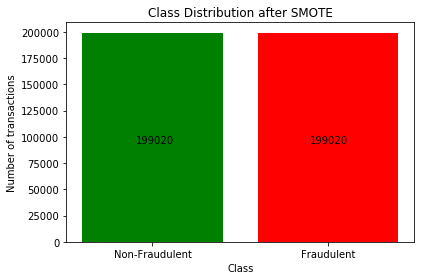

In [307]:
plt.bar(['Non-Fraudulent','Fraudulent'], [Counter(y_smote)[0], Counter(y_smote)[1]], color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_smote)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.title("Class Distribution after SMOTE")
plt.tight_layout()
plt.show()

## <center><u>Model 1: Logistic Regression

In [613]:
logreg = LogisticRegression(random_state=100)
model = logreg.fit(X_smote, y_smote)

In [614]:
model.coef_

array([[ 0.43243515, -0.53498664,  0.04835762,  1.23511344,  0.0979018 ,
        -0.13317431,  0.17838575, -0.84847797, -0.62752949, -1.19018597,
         0.97246584, -1.34069706, -0.3173232 , -1.74070072,  0.01815879,
        -0.92557053, -1.13800978, -0.42711776, -0.13459098,  0.44342853,
         0.42379556,  0.16575216, -0.63996423,  0.1651159 , -0.20403393,
         0.12063378,  0.15000254,  0.15370649, -0.00277601]])

##### Getting predicted values on the training set:

In [615]:
y_smote_pred = model.predict_proba(X_smote)[:,1]
y_smote_pred[:10]

array([0.01541466, 0.02655138, 0.01458571, 0.01535821, 0.06437869,
       0.00454221, 0.00061436, 0.00569583, 0.18581473, 0.00352716])

##### Reshaping the predicted values:

In [616]:
y_smote_pred = y_smote_pred.reshape(-1)

##### Resetting index of y_smote:

In [617]:
y_smote.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Class", "Class_Prob":

In [618]:
y_smote_pred_final = pd.DataFrame({'Class':y_smote.values, 'Class_Prob':y_smote_pred})
y_smote_pred_final.head()

,Class,Class_Prob
0,0,0.015415
1,0,0.026551
2,0,0.014586
3,0,0.015358
4,0,0.064379


##### Selecting a threshold value for the column "Class_Prob" as 0.5 and creating a column "Predicted Class" in the Dataframe which shows the value as 1 if Class_Prob is geater than 0.5, else shows the value as 0:

In [619]:
y_smote_pred_final['Predicted Class'] = y_smote_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_smote_pred_final.head()

,Class,Class_Prob,Predicted Class
0,0,0.015415,0
1,0,0.026551,0
2,0,0.014586,0
3,0,0.015358,0
4,0,0.064379,0


##### Confusion Matix:

In [620]:
confusion_train = metrics.confusion_matrix(y_smote_pred_final['Class'], y_smote_pred_final['Predicted Class'])
print(confusion_train)

[[195418   3602]
 [ 10070 188950]]


##### Checking Accuracy:

In [621]:
print("Accuracy: {}".format(metrics.accuracy_score(y_smote_pred_final['Class'], y_smote_pred_final['Predicted Class'])))

Accuracy: 0.965651693297156


##### Metrics other than Accuracy in Traing Data Set:

In [622]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.949402
Specificity,0.981901
False Positive Rate,0.018099
Positive Predictive Value,0.981293
Negative Predictive Value,0.950995


### Plotting ROC Curve for Training Data:

In [623]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [624]:
fpr, tpr, thresholds = metrics.roc_curve(y_smote_pred_final['Class'], y_smote_pred_final['Class_Prob'], drop_intermediate = False )

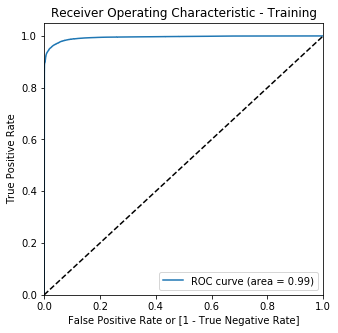

In [625]:
roc_curve(y_smote_pred_final['Class'], y_smote_pred_final['Class_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [626]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_smote_pred_final[i]= y_smote_pred_final['Class_Prob'].map(lambda x: 1 if x > i else 0)
y_smote_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015415,0,1,0,0,0,0,0,0,0,0,0
1,0,0.026551,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014586,0,1,0,0,0,0,0,0,0,0,0
3,0,0.015358,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064379,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [627]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_smote_pred_final['Class'], y_smote_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.940584,0.988870,0.892297
0.2,0.2,0.959692,0.977831,0.941554
0.3,0.3,0.964494,0.965878,0.963109
0.4,0.4,0.965330,0.955100,0.975560
0.5,0.5,0.965652,0.949402,0.981901
0.6,0.6,0.964081,0.941745,0.986418
0.7,0.7,0.962536,0.934595,0.990478
0.8,0.8,0.959780,0.926354,0.993207
0.9,0.9,0.954532,0.913908,0.995156


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

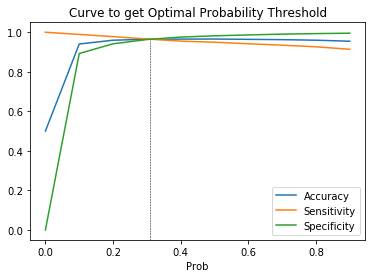

In [631]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.31, ymax= 0.92, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='best')
plt.show()

**From the above curve , 0.31 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.31:

In [632]:
y_smote_pred_final['Final_Predicted'] = y_smote_pred_final['Class_Prob'].map( lambda x: 1 if x > 0.31 else 0)
y_smote_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.015415,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.026551,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014586,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.015358,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.064379,0,1,0,0,0,0,0,0,0,0,0,0


##### Checking Accuracy:

In [633]:
accuracy = metrics.accuracy_score(y_smote_pred_final['Class'], y_smote_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9648527786152146


##### New Confusion matrix fo training:

In [634]:
confusion_new = metrics.confusion_matrix(y_smote_pred_final['Class'], y_smote_pred_final['Final_Predicted'])
confusion_new

array([[192026,   6994],
       [  6996, 192024]], dtype=int64)

##### Other Train Metrics:

In [635]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_smote_pred_final['Class'], y_smote_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_smote_pred)


# Metrics Dataframe
metrics_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train = metrics_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train, 4)

,Metrics_Training
Accuracy,0.9649
Sensitivity,0.9648
Specificity,0.9649
True Positive Rate,0.9648
False Positive Rate,0.0351
Positive Predictive Value,0.9649
Negative Predictive Value,0.9648
Misclassification Rate,0.0351
Precision,0.9649
Recall,0.9648


### Making Prediction on Test Set:

In [636]:
y_test_pred = model.predict_proba(X_test)[:,1]
y_test_pred[:10]

array([0.56244189, 0.68346444, 0.01846764, 0.00814209, 0.0206708 ,
       0.01774278, 0.00736929, 0.01790651, 0.0093901 , 0.00454443])

##### Reshaping predicted values, resetting index of y_test and creating a Dataframe with "Class" and "Class_Prob" columns for Test set:

In [637]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.562442
1,0,0.683464
2,0,0.018468
3,0,0.008142
4,0,0.020671


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.31:

In [638]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.31 else 0)
y_test_pred_final.head()

,Class,Class_Prob,Final_Predicted
0,0,0.562442,1
1,0,0.683464,1
2,0,0.018468,0
3,0,0.008142,0
4,0,0.020671,0


### Plotting the ROC Curve for Test Data:

In [639]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [640]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'], drop_intermediate = False )

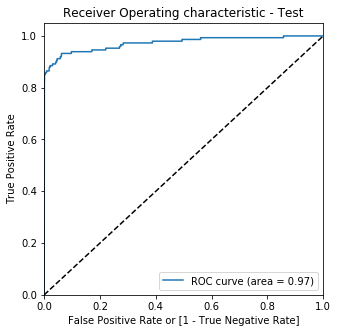

In [641]:
roc_curve_test(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])

In [642]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.9650761326264293


##### Confusion Matrix for Test data:

In [643]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[82327  2968]
 [   16   132]]


##### Other Test Metrics:

In [644]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test = metrics_test.T.rename(columns={0: 'Metrics_Test'})
metrics_test = pd.concat([metrics_train, metrics_test], axis=1)
round(metrics_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9649,0.9651
Sensitivity,0.9648,0.8919
Specificity,0.9649,0.9652
True Positive Rate,0.9648,0.8919
False Positive Rate,0.0351,0.0348
Positive Predictive Value,0.9649,0.0426
Negative Predictive Value,0.9648,0.9998
Misclassification Rate,0.0351,0.0349
Precision,0.9649,0.0426
Recall,0.9648,0.8919


## <center><u> Model 2: Decision Tree

In [337]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_initial = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_initial.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=5, random_state=100)

##### Getting predicted values on the training set:

In [338]:
y_pred_train = dt_initial.predict(X_smote)

##### Checking Classification Report:

In [339]:
print(classification_report(y_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    199020
           1       0.97      0.97      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040



##### Confusion Matrix for Training: 

In [340]:
confusion_train = confusion_matrix(y_smote, y_pred_train)
confusion_train

array([[193246,   5774],
       [  6271, 192749]], dtype=int64)

##### Checking Train Accuracy:

In [341]:
print("Accuracy: {}".format(accuracy_score(y_smote, y_pred_train)))

Accuracy: 0.9697392221887248


##### Other Train Metrics:

In [342]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_smote, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train)

# Metrics Dataframe:
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9697
Sensitivity,0.9685
Specificity,0.9710
True Positive Rate,0.9685
False Positive Rate,0.0290
Positive Predictive Value,0.9709
Negative Predictive Value,0.9686
Misclassification Rate,0.0303
Precision,0.9709
Recall,0.9685


##### Getting Predicted value on Test set:

In [343]:
y_pred_test = dt_initial.predict(X_test)

##### Confusion Matrix for Test:

In [344]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[82835,  2460],
       [   22,   126]], dtype=int64)

##### Checking Test Accuracy:

In [345]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy: 0.970951394496916


##### Other Test Metrics:

In [346]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)
#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9697,0.9710
Sensitivity,0.9685,0.8514
Specificity,0.9710,0.9712
True Positive Rate,0.9685,0.8514
False Positive Rate,0.0290,0.0288
Positive Predictive Value,0.9709,0.0487
Negative Predictive Value,0.9686,0.9997
Misclassification Rate,0.0303,0.0290
Precision,0.9709,0.0487
Recall,0.9685,0.8514


Let's tune the hyperparameter to get optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [347]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [348]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.638991,0.020585,0.041657,0.007365,2,{'max_depth': 2},0.940194,0.939682,0.937150,0.939009,0.001331,6,0.938770,0.939697,0.938608,0.939025,0.000480
1,14.483993,0.145685,0.052070,0.007362,7,{'max_depth': 7},0.982823,0.981474,0.980788,0.981695,0.000845,5,0.982541,0.982609,0.981851,0.982333,0.000342
2,23.412570,0.121691,0.057281,0.007364,12,{'max_depth': 12},0.995448,0.994777,0.995093,0.995106,0.000274,4,0.996639,0.996220,0.996574,0.996478,0.000184
3,29.579794,0.213933,0.057279,0.007362,17,{'max_depth': 17},0.997543,0.997211,0.997543,0.997432,0.000156,3,0.999103,0.998862,0.999201,0.999055,0.000143
4,33.573612,0.461412,0.057280,0.007365,22,{'max_depth': 22},0.997950,0.997965,0.997860,0.997925,0.000047,2,0.999646,0.999668,0.999563,0.999626,0.000045


##### Plotting Accuracies with max_depth:

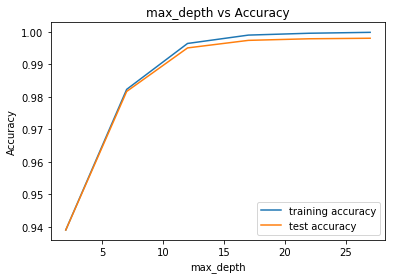

In [349]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both training and test score increase. After the value 25, the test score gradually reduces and train score increases. The model overfits the data at high value of max_depth.

#### (ii) min_samples_leaf Tuning:

In [350]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [351]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,34.199657,1.751234,0.062485,6.257699e-07,5,{'min_samples_leaf': 5},0.997302,0.997257,0.997015,0.997191,0.000126,1,0.999035,0.998967,0.998903,0.998969,0.000054
1,31.209093,1.520795,0.062485,2.209270e-02,25,{'min_samples_leaf': 25},0.994340,0.993707,0.993978,0.994008,0.000259,2,0.995659,0.995304,0.995474,0.995479,0.000145
2,30.592436,1.242530,0.052930,6.921991e-03,45,{'min_samples_leaf': 45},0.991838,0.991476,0.991536,0.991616,0.000158,3,0.993247,0.992938,0.993149,0.993111,0.000129
3,29.945944,1.086749,0.069288,6.535789e-03,65,{'min_samples_leaf': 65},0.990157,0.989727,0.989644,0.989843,0.000225,4,0.991178,0.991039,0.990831,0.991016,0.000142
4,28.274126,0.763856,0.057280,7.362717e-03,85,{'min_samples_leaf': 85},0.988778,0.987459,0.988084,0.988107,0.000539,5,0.989678,0.989038,0.989158,0.989291,0.000278


##### Plotting Accuracies with min_samples_leaf:

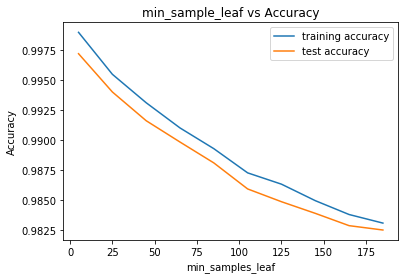

In [352]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_sample_leaf vs Accuracy")
plt.legend()
plt.show()

We can see that Train and Test Accuracy are constantly decreasing as min_sample_leaf increases.

#### (iii) min_samples_split Tuning:

In [353]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV :

In [354]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,36.299993,1.958416,0.062488,0.012756,5,{'min_samples_split': 5},0.998123,0.998169,0.998161,0.998151,0.000020,1,0.999951,0.999959,0.999902,0.999937,0.000025
1,36.245048,1.915652,0.062486,0.000002,25,{'min_samples_split': 25},0.997611,0.997581,0.997453,0.997548,0.000069,2,0.999344,0.999393,0.999352,0.999363,0.000022
2,36.596521,2.034310,0.073355,0.014509,45,{'min_samples_split': 45},0.996940,0.996797,0.997136,0.996958,0.000139,3,0.998779,0.998662,0.998873,0.998771,0.000086
3,36.889085,1.871776,0.062485,0.012755,65,{'min_samples_split': 65},0.996277,0.995953,0.996556,0.996262,0.000246,4,0.998097,0.997890,0.998184,0.998057,0.000123
4,36.297762,1.767544,0.054607,0.006377,85,{'min_samples_split': 85},0.995817,0.995282,0.995983,0.995694,0.000299,5,0.997558,0.997151,0.997411,0.997373,0.000168


##### Plotting Accuracies with min_samples_split:

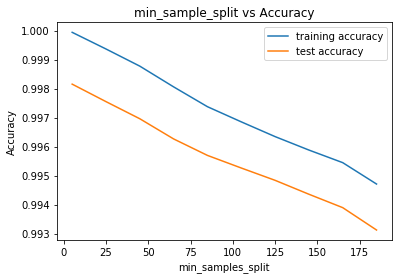

In [355]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_sample_split vs Accuracy")
plt.legend()
plt.show()

This shows that Train and Test accuracy are constantly decreasing.

##### Randomized Search to Find Optimal Hyperparameters:

In [356]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 30, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the Randomized search model
dtree = DecisionTreeClassifier(random_state = 100)
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, scoring="accuracy", verbose = 1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 30, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Cross Validation results:

In [357]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.799662,1.035874,0.057281,0.007364,100,50,25,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.991280,0.991046,0.991363,0.991230,0.000134,4,0.992685,0.992403,0.992648,0.992579,0.000125
1,10.845475,0.311109,0.052071,0.007365,100,50,5,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.969837,0.969174,0.969046,0.969352,0.000347,7,0.969897,0.970112,0.969800,0.969936,0.000131
2,25.310411,0.239406,0.057279,0.007363,50,50,10,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.991257,0.986584,0.989765,0.989202,0.001949,6,0.991762,0.987345,0.990809,0.989972,0.001898
3,16.422055,0.193807,0.041659,0.007366,50,100,5,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.965820,0.963536,0.965240,0.964865,0.000969,10,0.965571,0.964580,0.965926,0.965359,0.000569
4,10.331808,0.236102,0.041656,0.007364,50,100,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.969807,0.968729,0.968948,0.969161,0.000465,8,0.969845,0.969928,0.969573,0.969782,0.000151


##### Getting best parameters:

In [358]:
grid_search.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 50,
 'max_depth': 20,
 'criterion': 'entropy'}

##### Printing the optimal accuracy score and hyperparameters:

In [359]:
print("Best Accuracy: {}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

Best Accuracy: 0.992741935483871
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=50,
                       min_samples_split=50, random_state=100)


##### Running the model with best parameters obtained from grid search:

In [360]:
# Model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=25, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
dt_final.fit(X_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=50,
                       min_samples_split=100, random_state=100)

##### Getting predicted values on Training set:

In [361]:
y_pred_train_dt = dt_final.predict(X_smote)

##### Checking Classification Report for training:

In [362]:
print(classification_report(y_smote, y_pred_train_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    199020
           1       0.99      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [363]:
confusion_train = confusion_matrix(y_smote, y_pred_train_dt)
confusion_train

array([[197956,   1064],
       [   808, 198212]], dtype=int64)

##### Accuracy Score for training:

In [364]:
print("Accuracy_Score: {}".format(dt_final.score(X_smote, y_smote)))

Accuracy_Score: 0.9952969550798915


##### Other Training Metrics:

In [365]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

accuracy = dt_final.score(X_smote, y_smote)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train_dt)

# Metrics Dataframe
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9953
Sensitivity,0.9959
Specificity,0.9947
True Positive Rate,0.9959
False Positive Rate,0.0053
Positive Predictive Value,0.9947
Negative Predictive Value,0.9959
Misclassification Rate,0.0047
Precision,0.9947
Recall,0.9959


##### Making prediction on Test set:

In [366]:
y_pred_test_dt = dt_final.predict(X_test)

##### Checking Classification Report for test:

In [367]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.18      0.84      0.30       148

    accuracy                           0.99     85443
   macro avg       0.59      0.92      0.65     85443
weighted avg       1.00      0.99      1.00     85443



##### Confusion Matrix for test:

In [368]:
confusion_test = confusion_matrix(y_test, y_pred_test_dt)
confusion_test

array([[84747,   548],
       [   24,   124]], dtype=int64)

##### Accuracy Score for test:

In [369]:
print("Accuracy_Score: {}".format(dt_final.score(X_test, y_test)))

Accuracy_Score: 0.9933054785061386


##### Other Test Metrics:

In [370]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = dt_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9953,0.9933
Sensitivity,0.9959,0.8378
Specificity,0.9947,0.9936
True Positive Rate,0.9959,0.8378
False Positive Rate,0.0053,0.0064
Positive Predictive Value,0.9947,0.1845
Negative Predictive Value,0.9959,0.9997
Misclassification Rate,0.0047,0.0067
Precision,0.9947,0.1845
Recall,0.9959,0.8378


## <Center><u>Model 3: Random Forest<Center><u>

In [371]:
from sklearn.ensemble import RandomForestClassifier
rfc_initial = RandomForestClassifier(random_state=100, n_jobs=-1)
rfc_initial.fit(X_smote, y_smote)

RandomForestClassifier(n_jobs=-1, random_state=100)

##### Getting predicted values on Training set:

In [372]:
y_pred_train = rfc_initial.predict(X_smote)

##### Confusion Matrix:

In [373]:
confusion_train = confusion_matrix(y_smote, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [374]:
print("Accuracy_Score: {}".format(accuracy_score(y_smote, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [375]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_smote, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [376]:
y_pred_test = rfc_initial.predict(X_test)

##### Confusion Matrix for Test:

In [377]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85277,    18],
       [   25,   123]], dtype=int64)

##### Checking Test Accuracy:

In [378]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9994967405170698


##### Other Test Metrics:

In [379]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9995
Sensitivity,1.0,0.8311
Specificity,1.0,0.9998
True Positive Rate,1.0,0.8311
False Positive Rate,0.0,0.0002
Positive Predictive Value,1.0,0.8723
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0005
Precision,1.0,0.8723
Recall,1.0,0.8311


Let's tune hyperparameters to het optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `n_estimators`, `max_features`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [380]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_smote, y_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 19.4min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [381]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,57.441043,0.192627,1.787688,0.263929,2,{'max_depth': 2},0.944913,0.944302,0.943933,0.944382,0.000404,6,0.944110,0.944411,0.944637,0.944386,0.000216
1,174.664578,0.379799,3.482750,0.536473,7,{'max_depth': 7},0.979741,0.979153,0.979062,0.979319,0.000301,5,0.979247,0.979744,0.980042,0.979678,0.000328
2,268.002649,1.794586,4.711494,0.053841,12,{'max_depth': 12},0.996812,0.996880,0.996608,0.996767,0.000115,4,0.996951,0.997648,0.997030,0.997210,0.000312
3,317.125398,3.343586,4.905459,0.155967,17,{'max_depth': 17},0.999774,0.999751,0.999781,0.999769,0.000013,3,0.999898,0.999936,0.999898,0.999911,0.000018
4,331.324033,9.669451,5.033636,0.024020,22,{'max_depth': 22},0.999902,0.999804,0.999894,0.999867,0.000045,2,0.999974,0.999981,0.999985,0.999980,0.000005


##### Plotting Accuracies with max_depth:

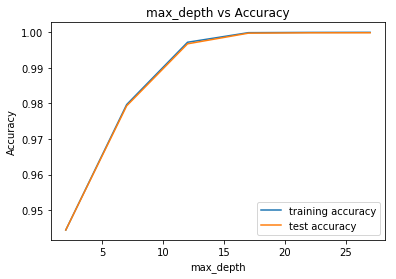

In [382]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores gradually increase till a point, but after that test score starts to decrease.

#### (ii) n_estimators Tuning:

In [383]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(50, 800, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1, random_state=100)
rf.fit(X_smote, y_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 43.6min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'n_estimators': range(50, 800, 200)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [384]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,119.633042,0.372115,1.620603,0.038961,50,{'n_estimators': 50},0.991792,0.991657,0.991152,0.991534,0.000276,3,0.991683,0.992497,0.991653,0.991944,0.000391
1,590.787392,3.393112,7.226968,0.806321,250,{'n_estimators': 250},0.992101,0.991182,0.991257,0.991513,0.000417,4,0.991951,0.992192,0.991819,0.991987,0.000154
2,1069.606293,5.521126,12.682218,0.324061,450,{'n_estimators': 450},0.992049,0.991295,0.991325,0.991556,0.000348,1,0.991777,0.992196,0.991894,0.991956,0.000176
3,1187.412504,229.922820,8.516207,3.525191,650,{'n_estimators': 650},0.992049,0.991250,0.991370,0.991556,0.000352,1,0.991770,0.992116,0.991958,0.991948,0.000142


##### Plotting Accuracies with n_estimators:

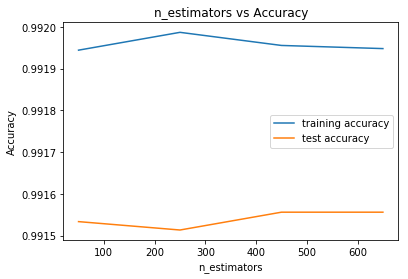

In [385]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

#### (iii) max_features Tuning:

In [386]:
# RandomizedSearchCV to find optimal max_features
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose = 1, random_state=100, n_jobs=-1, return_train_score=True)
rf.fit(X_smote, y_smote)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 22.8min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1, param_distributions={'max_features': [4, 8, 24]},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [387]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,213.422252,0.098064,2.950836,0.138316,4,{'max_features': 4},0.990737,0.990187,0.990277,0.990400,0.000241,3,0.990715,0.990986,0.990854,0.990851,0.000111
1,399.435685,5.164496,3.820023,0.490091,8,{'max_features': 8},0.994121,0.994121,0.994438,0.994227,0.000149,2,0.994072,0.995014,0.994984,0.994690,0.000437
2,863.933621,99.881723,1.784090,0.959994,24,{'max_features': 24},0.996699,0.995968,0.996314,0.996327,0.000299,1,0.997083,0.996616,0.997019,0.996906,0.000207


##### Plotting Accuracies with max_features:

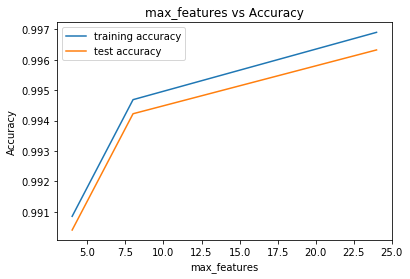

In [388]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("max_features vs Accuracy")
plt.legend()
plt.show()

#### (iv) min_samples_leaf Tuning:

In [389]:
# RandomizedSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_smote, y_smote)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 10.8min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(100, 400, 100)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [390]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,290.309314,4.804752,3.486017,0.529098,100,{'min_samples_leaf': 100},0.995606,0.995297,0.995011,0.995304,0.000243,1,0.995983,0.995945,0.996009,0.995979,0.000026
1,273.306410,5.824613,3.834088,0.269119,200,{'min_samples_leaf': 200},0.989938,0.988702,0.988747,0.989129,0.000572,2,0.989829,0.989591,0.989554,0.989658,0.000122
2,199.238135,86.528805,1.605446,0.636650,300,{'min_samples_leaf': 300},0.986313,0.986456,0.986245,0.986338,0.000088,3,0.986023,0.987281,0.986969,0.986758,0.000535


##### Plotting Accuracies with min_samples_leaf:

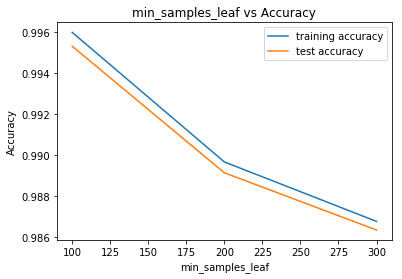

In [391]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_samples_leaf vs Accuracy")
plt.legend()
plt.show()

#### (v) min_samples_split Tuning:

In [392]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.7min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(200, 500, 50)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [393]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,180.100560,2.165450,1.721068,0.294551,200,{'min_samples_split': 200},0.999473,0.999157,0.999308,0.999313,0.000129,1,0.999308,0.999406,0.999376,0.999363,0.000041
1,178.593598,0.432411,1.384965,0.076811,250,{'min_samples_split': 250},0.999473,0.999142,0.999248,0.999288,0.000138,4,0.999315,0.999406,0.999338,0.999353,0.000038
2,177.432558,1.089229,1.765644,0.874724,300,{'min_samples_split': 300},0.999458,0.999157,0.999278,0.999298,0.000124,2,0.999330,0.999413,0.999330,0.999358,0.000039
3,176.682067,1.126982,2.218072,0.494326,350,{'min_samples_split': 350},0.999473,0.999157,0.999248,0.999293,0.000133,3,0.999323,0.999413,0.999330,0.999355,0.000041
4,176.241627,1.022831,2.012954,0.006781,400,{'min_samples_split': 400},0.999458,0.999157,0.999248,0.999288,0.000126,4,0.999323,0.999413,0.999308,0.999348,0.000047


##### Plotting Accuracies with min_samples_split:

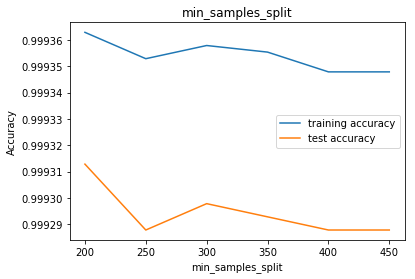

In [394]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_samples_split")
plt.legend()
plt.show()

##### Randomized Search to Find Optimal Hyperparameters:

In [395]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 77.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 300, 200),
                                        'min_samples_split': range(200, 400, 200),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, verbose=1)

##### Optimal Accuracy Score:

In [396]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.99119686463672


##### Optimal Hyperparameters:

In [397]:
grid_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 200,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 10}

In [398]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)

##### Running the model with best parameters obtained from grid search:

In [399]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300, random_state=100,
                             n_jobs=-1)
rfc_final.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300, n_jobs=-1,
                       random_state=100)

##### Getting predicted values on Training set:

In [400]:
y_pred_train_rf = rfc_final.predict(X_smote)

##### Getting Classification Report for Training:

In [401]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_smote, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    199020
           1       1.00      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



##### Confusion Matrix for training:

In [402]:
confusion_train_rf = confusion_matrix(y_smote, y_pred_train_rf)
confusion_train_rf

array([[198499,    521],
       [  2237, 196783]], dtype=int64)

##### Checking Training Accuracy:

In [403]:
print("Accuracy_Score: {}".format(rfc_final.score(X_smote, y_smote)))

Accuracy_Score: 0.9930710481358658


##### Other Training Metrics:

In [404]:
TP = confusion_train_rf[1,1] # true positive 
TN = confusion_train_rf[0,0] # true negatives
FP = confusion_train_rf[0,1] # false positives
FN = confusion_train_rf[1,0] # false negatives

accuracy = rfc_final.score(X_smote, y_smote)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train_rf)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,0.9931
Sensitivity,0.9888
Specificity,0.9974
True Positive Rate,0.9888
False Positive Rate,0.0026
Positive Predictive Value,0.9974
Negative Predictive Value,0.9889
Misclassification Rate,0.0069
Precision,0.9974
Recall,0.9888


##### Making prediction on Test:

In [405]:
y_pred_test_rf = rfc_final.predict(X_test)

##### Getting Classification Report for Test:

In [406]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.35      0.86      0.50       148

    accuracy                           1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [407]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)
confusion_test_rf

array([[85062,   233],
       [   21,   127]], dtype=int64)

##### Checking Test Accuracy:

In [408]:
print("Accuracy_Score: {}".format(rfc_final.score(X_test, y_test)))

Accuracy_Score: 0.9970272579380406


##### Other Test Metrics:

In [409]:
TP = confusion_test_rf[1,1] # true positive 
TN = confusion_test_rf[0,0] # true negatives
FP = confusion_test_rf[0,1] # false positives
FN = confusion_test_rf[1,0] # false negatives

accuracy = rfc_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9931,0.9970
Sensitivity,0.9888,0.8581
Specificity,0.9974,0.9973
True Positive Rate,0.9888,0.8581
False Positive Rate,0.0026,0.0027
Positive Predictive Value,0.9974,0.3528
Negative Predictive Value,0.9889,0.9998
Misclassification Rate,0.0069,0.0030
Precision,0.9974,0.3528
Recall,0.9888,0.8581


## <center><u>Model 4: XGBoost

In [410]:
from xgboost import XGBClassifier
xgb_initial = XGBClassifier(random_state=100, n_jobs=-1)
xgb_initial.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

##### Getting predicted values on Training set:

In [411]:
y_pred_train = xgb_initial.predict(X_smote)

##### Confusion Matrix:

In [412]:
confusion_train = confusion_matrix(y_smote, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [413]:
print("Accuracy_Score: {}".format(accuracy_score(y_smote, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [414]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_smote, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [415]:
y_pred_test = xgb_initial.predict(X_test)

##### Confusion Matrix for Test:

In [416]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85264,    31],
       [   24,   124]], dtype=int64)

##### Checking Test Accuracy:

In [417]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9993562960102056


##### Other Test Metrics:

In [418]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9994
Sensitivity,1.0,0.8378
Specificity,1.0,0.9996
True Positive Rate,1.0,0.8378
False Positive Rate,0.0,0.0004
Positive Predictive Value,1.0,0.8000
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0006
Precision,1.0,0.8000
Recall,1.0,0.8378


## Hyperparameter Optimization:
We are going to tune the features `max_depth` and `n_estimators`:

#### (i) max_depth Tuning:

In [419]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 30, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_smote, y_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 35.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Scores of GridSearch CV:

In [420]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,299.540122,0.261283,1.335429,0.030932,5,{'max_depth': 5},0.999789,0.999699,0.999729,0.999739,0.000038,5,0.999989,0.999996,0.999989,0.999991,0.000004
1,498.202518,57.410643,2.438364,0.565779,10,{'max_depth': 10},0.999804,0.999736,0.999842,0.999794,0.000044,3,1.000000,1.000000,1.000000,1.000000,0.000000
2,658.989687,39.004348,2.915630,0.093686,15,{'max_depth': 15},0.999812,0.999721,0.999872,0.999802,0.000062,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,741.502654,7.831306,2.886110,0.096833,20,{'max_depth': 20},0.999827,0.999721,0.999879,0.999809,0.000066,1,1.000000,1.000000,1.000000,1.000000,0.000000
4,513.102157,31.993889,1.382629,0.288462,25,{'max_depth': 25},0.999804,0.999714,0.999849,0.999789,0.000056,4,1.000000,1.000000,1.000000,1.000000,0.000000


##### Plotting Accuracies with max_depth:

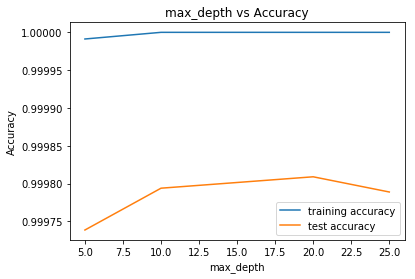

In [421]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

#### (ii) n_estimators Tuning:

In [422]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(2, 25, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_smote, y_smote)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

In [423]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.791646,0.035953,0.312429,0.012755,2,{'n_estimators': 2},0.980472,0.978580,0.979236,0.979429,0.000784,5,0.980080,0.979579,0.980114,0.979924,0.000245
1,27.867243,0.084702,0.299536,0.006326,7,{'n_estimators': 7},0.989109,0.988273,0.988830,0.988737,0.000348,4,0.988883,0.989211,0.989787,0.989294,0.000374
2,46.292843,0.192190,0.352062,0.022136,12,{'n_estimators': 12},0.993496,0.992222,0.992305,0.992674,0.000582,3,0.993677,0.993394,0.993232,0.993434,0.000184
3,66.179519,1.517955,0.431177,0.025824,17,{'n_estimators': 17},0.995546,0.994739,0.994302,0.994862,0.000515,2,0.995904,0.995632,0.994958,0.995498,0.000398
4,76.705542,7.066598,0.296542,0.039979,22,{'n_estimators': 22},0.996834,0.997362,0.996631,0.996943,0.000308,1,0.997241,0.997927,0.997219,0.997463,0.000329


##### Plotting Accuracies with n_estimators:

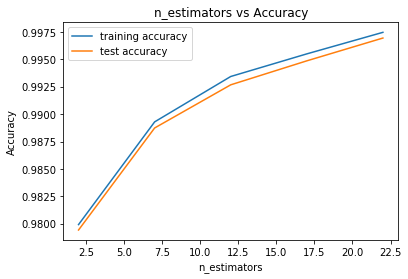

In [424]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

In [425]:
param_grid = {
    'max_depth': range(5, 40, 5),
    'n_estimators': range(2, 40, 5)
}
# Create a based model
xgboost = XGBClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.7min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Optimal Accuracy Score:

In [426]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9997035473821726


##### Optimal Hyperparameters:

In [427]:
grid_search.best_params_

{'n_estimators': 37, 'max_depth': 10}

In [428]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=37, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Running the model with best parameters obtained from grid search:

In [429]:
# model with the best hyperparameters
from xgboost import XGBClassifier
xgb_final = XGBClassifier(   max_depth=20,
                             n_estimators=32, 
                             random_state=100,
                             n_jobs=-1)
xgb_final.fit(X_smote, y_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=32, n_jobs=-1, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [430]:
y_pred_train_xgb_final = xgb_final.predict(X_smote)

##### Getting Classification Report for Training:

In [431]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_smote, y_pred_train_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [432]:
confusion_train_xgb_final = confusion_matrix(y_smote, y_pred_train_xgb_final)
confusion_train_xgb_final

array([[199013,      7],
       [     0, 199020]], dtype=int64)

##### Checking Training Accuracy:

In [433]:
print("Accuracy_Score: {}".format(xgb_final.score(X_smote, y_smote)))

Accuracy_Score: 0.999982413827756


##### Other Training Metrics:

In [434]:
TP = confusion_train_xgb_final[1,1] # true positive 
TN = confusion_train_xgb_final[0,0] # true negatives
FP = confusion_train_xgb_final[0,1] # false positives
FN = confusion_train_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_smote, y_smote)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_smote, y_pred_train_xgb_final)

#Metrics Dataframe
metrics_xgb_final_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_train = metrics_xgb_final_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_xgb_final_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Making prediction on Test:

In [435]:
y_pred_test_xgb_final = xgb_final.predict(X_test)

##### Getting Classification Report for Test:

In [436]:
print(classification_report(y_test, y_pred_test_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.84      0.80       148

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [437]:
confusion_test_xgb_final = confusion_matrix(y_test, y_pred_test_xgb_final)
confusion_test_xgb_final

array([[85257,    38],
       [   23,   125]], dtype=int64)

##### Checking Test Accuracy:

In [438]:
print("Accuracy_Score: {}".format(xgb_final.score(X_test, y_test)))

Accuracy_Score: 0.9992860737567735


##### Other Test Metrics:

In [439]:
TP = confusion_test_xgb_final[1,1] # true positive 
TN = confusion_test_xgb_final[0,0] # true negatives
FP = confusion_test_xgb_final[0,1] # false positives
FN = confusion_test_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb_final)

#Metrics Dataframe
metrics_xgb_final_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_test = metrics_xgb_final_test.T.rename(columns={0: 'Metrics_Test'})
metrics_xgb_final_test = pd.concat([metrics_xgb_final_train, metrics_xgb_final_test], axis=1)
round(metrics_xgb_final_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9993
Sensitivity,1.0,0.8446
Specificity,1.0,0.9996
True Positive Rate,1.0,0.8446
False Positive Rate,0.0,0.0004
Positive Predictive Value,1.0,0.7669
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0007
Precision,1.0,0.7669
Recall,1.0,0.8446


## Method 3: ADASYN

In [440]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=100)
X_adasyn, y_adasyn = smote.fit_resample(X_train, y_train)

##### Plotting Class distribution after ADASYN:

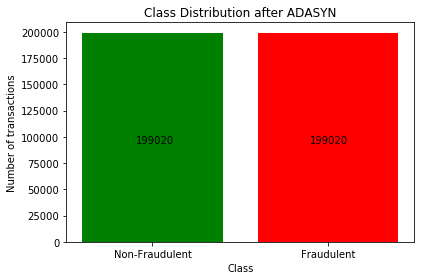

In [441]:
plt.bar(['Non-Fraudulent','Fraudulent'], [Counter(y_adasyn)[0], Counter(y_adasyn)[1]], color=['g','r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_adasyn)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_adasyn)[1]), (0.70, 0.45), xycoords='axes fraction')
plt.title("Class Distribution after ADASYN")
plt.tight_layout()
plt.show()

## <center><u>Model 1: Logistic Regression

In [645]:
logreg = LogisticRegression(random_state=100)
model = logreg.fit(X_adasyn, y_adasyn)

In [646]:
model.coef_

array([[ 0.43243515, -0.53498664,  0.04835762,  1.23511344,  0.0979018 ,
        -0.13317431,  0.17838575, -0.84847797, -0.62752949, -1.19018597,
         0.97246584, -1.34069706, -0.3173232 , -1.74070072,  0.01815879,
        -0.92557053, -1.13800978, -0.42711776, -0.13459098,  0.44342853,
         0.42379556,  0.16575216, -0.63996423,  0.1651159 , -0.20403393,
         0.12063378,  0.15000254,  0.15370649, -0.00277601]])

##### Getting predicted values on the training set:

In [647]:
y_adasyn_pred = model.predict_proba(X_adasyn)[:,1]
y_adasyn_pred[:10]

array([0.01541466, 0.02655138, 0.01458571, 0.01535821, 0.06437869,
       0.00454221, 0.00061436, 0.00569583, 0.18581473, 0.00352716])

##### Reshaping the predicted values:

In [648]:
y_adasyn_pred = y_adasyn_pred.reshape(-1)

##### Resetting index of y_adasyn:

In [649]:
y_adasyn.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Class", "Class_Prob":

In [650]:
y_adasyn_pred_final = pd.DataFrame({'Class':y_adasyn.values, 'Class_Prob':y_adasyn_pred})
y_adasyn_pred_final.head()

,Class,Class_Prob
0,0,0.015415
1,0,0.026551
2,0,0.014586
3,0,0.015358
4,0,0.064379


##### Selecting a threshold value for the column "Class_Prob" as 0.5 and creating a column "Predicted Class" in the Dataframe which shows the value as 1 if Class_Prob is geater than 0.5, else shows the value as 0:

In [651]:
y_adasyn_pred_final['Predicted Class'] = y_adasyn_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_adasyn_pred_final.head()

,Class,Class_Prob,Predicted Class
0,0,0.015415,0
1,0,0.026551,0
2,0,0.014586,0
3,0,0.015358,0
4,0,0.064379,0


##### Confusion Matix:

In [652]:
confusion_train = metrics.confusion_matrix(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Predicted Class'])
print(confusion_train)

[[195418   3602]
 [ 10070 188950]]


##### Checking Accuracy:

In [653]:
print("Accuracy: {}".format(metrics.accuracy_score(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Predicted Class'])))

Accuracy: 0.965651693297156


##### Metrics other than Accuracy in Traing Data Set:

In [654]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.949402
Specificity,0.981901
False Positive Rate,0.018099
Positive Predictive Value,0.981293
Negative Predictive Value,0.950995


### Plotting ROC Curve for Training Data:

In [655]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [656]:
fpr, tpr, thresholds = metrics.roc_curve(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Class_Prob'], drop_intermediate = False )

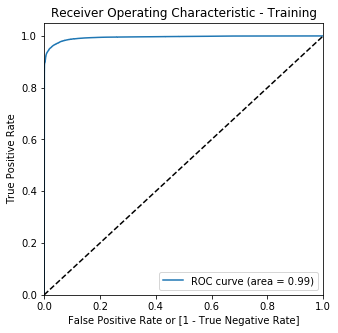

In [657]:
roc_curve(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Class_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [658]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_adasyn_pred_final[i]= y_adasyn_pred_final['Class_Prob'].map(lambda x: 1 if x > i else 0)
y_adasyn_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.015415,0,1,0,0,0,0,0,0,0,0,0
1,0,0.026551,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014586,0,1,0,0,0,0,0,0,0,0,0
3,0,0.015358,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064379,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [659]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_adasyn_pred_final['Class'], y_adasyn_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.940584,0.988870,0.892297
0.2,0.2,0.959692,0.977831,0.941554
0.3,0.3,0.964494,0.965878,0.963109
0.4,0.4,0.965330,0.955100,0.975560
0.5,0.5,0.965652,0.949402,0.981901
0.6,0.6,0.964081,0.941745,0.986418
0.7,0.7,0.962536,0.934595,0.990478
0.8,0.8,0.959780,0.926354,0.993207
0.9,0.9,0.954532,0.913908,0.995156


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

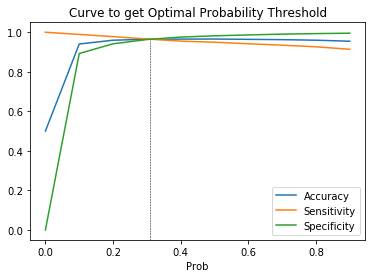

In [667]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.31, ymax= 0.92, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='best')
plt.show()

**From the above curve , 0.31 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.31:

In [668]:
y_adasyn_pred_final['Final_Predicted'] = y_adasyn_pred_final['Class_Prob'].map( lambda x: 1 if x > 0.31 else 0)
y_adasyn_pred_final.head()

,Class,Class_Prob,Predicted Class,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.015415,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.026551,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.014586,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.015358,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.064379,0,1,0,0,0,0,0,0,0,0,0,0


##### Checking Accuracy:

In [669]:
accuracy = metrics.accuracy_score(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.9648527786152146


##### New Confusion matrix fo training:

In [670]:
confusion_new = metrics.confusion_matrix(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Final_Predicted'])
confusion_new

array([[192026,   6994],
       [  6996, 192024]], dtype=int64)

##### Other Train Metrics:

In [671]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_adasyn_pred_final['Class'], y_adasyn_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_adasyn_pred)


# Metrics Dataframe
metrics_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train = metrics_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train, 4)

,Metrics_Training
Accuracy,0.9649
Sensitivity,0.9648
Specificity,0.9649
True Positive Rate,0.9648
False Positive Rate,0.0351
Positive Predictive Value,0.9649
Negative Predictive Value,0.9648
Misclassification Rate,0.0351
Precision,0.9649
Recall,0.9648


### Making Prediction on Test Set:

In [672]:
y_test_pred = model.predict_proba(X_test)[:,1]
y_test_pred[:10]

array([0.56244189, 0.68346444, 0.01846764, 0.00814209, 0.0206708 ,
       0.01774278, 0.00736929, 0.01790651, 0.0093901 , 0.00454443])

##### Reshaping predicted values, resetting index of y_test and creating a Dataframe with "Class" and "Class_Prob" columns for Test set:

In [673]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Class':y_test.values, 'Class_Prob':y_test_pred})
y_test_pred_final.head()

,Class,Class_Prob
0,0,0.562442
1,0,0.683464
2,0,0.018468
3,0,0.008142
4,0,0.020671


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.31:

In [674]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Class_Prob'].map(lambda x: 1 if x > 0.31 else 0)
y_test_pred_final.head()

,Class,Class_Prob,Final_Predicted
0,0,0.562442,1
1,0,0.683464,1
2,0,0.018468,0
3,0,0.008142,0
4,0,0.020671,0


### Plotting the ROC Curve for Test Data:

In [675]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [676]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'], drop_intermediate = False )

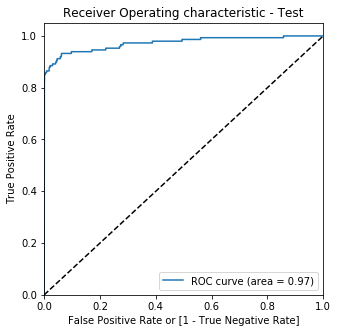

In [677]:
roc_curve_test(y_test_pred_final['Class'], y_test_pred_final['Class_Prob'])

In [678]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.9650761326264293


##### Confusion Matrix for Test data:

In [679]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[82327  2968]
 [   16   132]]


##### Other Test Metrics:

In [680]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Class'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test = metrics_test.T.rename(columns={0: 'Metrics_Test'})
metrics_test = pd.concat([metrics_train, metrics_test], axis=1)
round(metrics_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9649,0.9651
Sensitivity,0.9648,0.8919
Specificity,0.9649,0.9652
True Positive Rate,0.9648,0.8919
False Positive Rate,0.0351,0.0348
Positive Predictive Value,0.9649,0.0426
Negative Predictive Value,0.9648,0.9998
Misclassification Rate,0.0351,0.0349
Precision,0.9649,0.0426
Recall,0.9648,0.8919


## <center><u> Model 2: Decision Tree

In [471]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_initial = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_initial.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=5, random_state=100)

##### Getting predicted values on the training set:

In [472]:
y_pred_train = dt_initial.predict(X_adasyn)

##### Checking Classification Report:

In [473]:
print(classification_report(y_adasyn, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    199020
           1       0.97      0.97      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040



##### Confusion Matrix for Training: 

In [474]:
confusion_train = confusion_matrix(y_adasyn, y_pred_train)
confusion_train

array([[193246,   5774],
       [  6271, 192749]], dtype=int64)

##### Checking Train Accuracy:

In [475]:
print("Accuracy: {}".format(accuracy_score(y_adasyn, y_pred_train)))

Accuracy: 0.9697392221887248


##### Other Train Metrics:

In [476]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_adasyn, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train)

# Metrics Dataframe:
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
metrics_dtree_train

,Metrics_Training
Accuracy,0.969739
Sensitivity,0.968491
Specificity,0.970988
True Positive Rate,0.968491
False Positive Rate,0.029012
Positive Predictive Value,0.970915
Negative Predictive Value,0.968569
Misclassification Rate,0.030261
Precision,0.970915
Recall,0.968491


##### Getting Predicted value on Test set:

In [477]:
y_pred_test = dt_initial.predict(X_test)

##### Confusion Matrix for Test:

In [478]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[82835,  2460],
       [   22,   126]], dtype=int64)

##### Checking Test Accuracy:

In [479]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy: 0.970951394496916


##### Other Test Metrics:

In [480]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)
#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.97,0.97
Sensitivity,0.97,0.85
Specificity,0.97,0.97
True Positive Rate,0.97,0.85
False Positive Rate,0.03,0.03
Positive Predictive Value,0.97,0.05
Negative Predictive Value,0.97,1.00
Misclassification Rate,0.03,0.03
Precision,0.97,0.05
Recall,0.97,0.85


Let's tune the hyperparameter to get optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [481]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [482]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.082080,0.033578,0.047542,0.001243,2,{'max_depth': 2},0.940194,0.939682,0.937150,0.939009,0.001331,6,0.938770,0.939697,0.938608,0.939025,0.000480
1,14.639449,0.241423,0.048866,0.003551,7,{'max_depth': 7},0.982823,0.981474,0.980788,0.981695,0.000845,5,0.982541,0.982609,0.981851,0.982333,0.000342
2,23.635516,0.187112,0.055073,0.005261,12,{'max_depth': 12},0.995448,0.994777,0.995093,0.995106,0.000274,4,0.996639,0.996220,0.996574,0.996478,0.000184
3,30.013266,0.359425,0.062501,0.008783,17,{'max_depth': 17},0.997543,0.997211,0.997543,0.997432,0.000156,3,0.999103,0.998862,0.999201,0.999055,0.000143
4,34.286180,0.604699,0.061170,0.003848,22,{'max_depth': 22},0.997950,0.997965,0.997860,0.997925,0.000047,2,0.999646,0.999668,0.999563,0.999626,0.000045


##### Plotting Accuracies with max_depth:

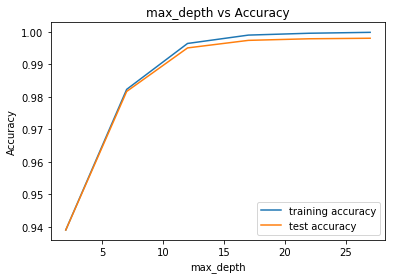

In [483]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both training and test score increase. After the value 25, the test score gradually reduces and train score increases. The model overfits the data at high value of max_depth.

#### (ii) min_samples_leaf Tuning:

In [484]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [485]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,42.449390,2.048943,0.072805,0.010679,5,{'min_samples_leaf': 5},0.997302,0.997257,0.997015,0.997191,0.000126,1,0.999035,0.998967,0.998903,0.998969,0.000054
1,37.964695,2.280423,0.072143,0.006002,25,{'min_samples_leaf': 25},0.994340,0.993707,0.993978,0.994008,0.000259,2,0.995659,0.995304,0.995474,0.995479,0.000145
2,36.513405,1.838883,0.068816,0.019897,45,{'min_samples_leaf': 45},0.991838,0.991476,0.991536,0.991616,0.000158,3,0.993247,0.992938,0.993149,0.993111,0.000129
3,35.236812,0.922687,0.065159,0.008554,65,{'min_samples_leaf': 65},0.990157,0.989727,0.989644,0.989843,0.000225,4,0.991178,0.991039,0.990831,0.991016,0.000142
4,30.431325,1.109511,0.068485,0.008934,85,{'min_samples_leaf': 85},0.988778,0.987459,0.988084,0.988107,0.000539,5,0.989678,0.989038,0.989158,0.989291,0.000278


##### Plotting Accuracies with min_samples_leaf:

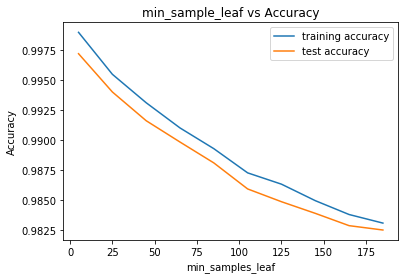

In [486]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_sample_leaf vs Accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf, the tree shows overfitting. After the value 160, the model becomes more stable and performs well.

#### (iii) min_samples_split Tuning:

In [487]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = RandomizedSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1)
tree.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(5, 200, 20)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Scores of GridSearch CV :

In [488]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,40.091800,2.103378,0.058844,0.002154,5,{'min_samples_split': 5},0.998123,0.998169,0.998161,0.998151,0.000020,1,0.999951,0.999959,0.999902,0.999937,0.000025
1,39.925656,2.373099,0.064944,0.013240,25,{'min_samples_split': 25},0.997611,0.997581,0.997453,0.997548,0.000069,2,0.999344,0.999393,0.999352,0.999363,0.000022
2,41.536797,2.890218,0.080453,0.008361,45,{'min_samples_split': 45},0.996940,0.996797,0.997136,0.996958,0.000139,3,0.998779,0.998662,0.998873,0.998771,0.000086
3,43.402325,2.294457,0.067155,0.005236,65,{'min_samples_split': 65},0.996277,0.995953,0.996556,0.996262,0.000246,4,0.998097,0.997890,0.998184,0.998057,0.000123
4,43.610766,2.294541,0.061503,0.004908,85,{'min_samples_split': 85},0.995817,0.995282,0.995983,0.995694,0.000299,5,0.997558,0.997151,0.997411,0.997373,0.000168


##### Plotting Accuracies with min_samples_split:

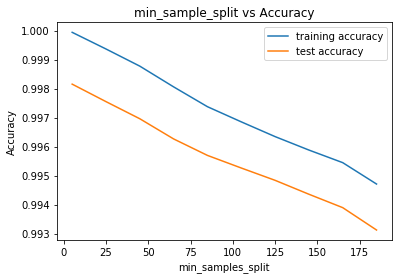

In [489]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_sample_split vs Accuracy")
plt.legend()
plt.show()

This shows that Train and Test accuracy are constantly decreasing.

##### Randomized Search to Find Optimal Hyperparameters:

In [490]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 3

# Instantiate the Randomized search model
dtree = DecisionTreeClassifier(random_state = 100)
grid_search = RandomizedSearchCV(estimator = dtree, param_distributions = param_grid, 
                          cv = n_folds, scoring="accuracy", verbose = 1, return_train_score=True, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(5, 15, 5),
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50)},
                   return_train_score=True, scoring='accuracy', verbose=1)

##### Cross Validation results:

In [491]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.635587,0.311216,0.062485,0.012753,100,50,10,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.991257,0.986584,0.989765,0.989202,0.001949,2,0.991762,0.987345,0.990809,0.989972,0.001898
1,26.008207,1.431488,0.048202,0.001248,100,100,10,entropy,"{'min_samples_split': 100, 'min_samples_leaf':...",0.989087,0.984504,0.986991,0.986861,0.001873,3,0.988774,0.985118,0.988024,0.987305,0.001576
2,10.260372,0.200772,0.045546,0.000471,50,100,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.969807,0.968729,0.968948,0.969161,0.000465,7,0.969845,0.969928,0.969573,0.969782,0.000151
3,10.406680,0.058402,0.049535,0.002858,100,50,5,gini,"{'min_samples_split': 100, 'min_samples_leaf':...",0.969837,0.969174,0.969046,0.969352,0.000347,6,0.969897,0.970112,0.969800,0.969936,0.000131
4,19.906126,0.075662,0.051529,0.002352,50,100,10,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.986313,0.985876,0.985288,0.985826,0.000420,5,0.986841,0.987255,0.986935,0.987010,0.000177


##### Getting best parameters:

In [492]:
grid_search.best_params_

{'min_samples_split': 100,
 'min_samples_leaf': 50,
 'max_depth': 10,
 'criterion': 'gini'}

##### Printing the optimal accuracy score and hyperparameters:

In [493]:
print("Best Accuracy: {}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

Best Accuracy: 0.9896342076173249
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)


##### Running the model with best parameters obtained from grid search:

In [494]:
# Model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_final.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50, random_state=100)

##### Getting predicted values on Training set:

In [495]:
y_pred_train_dt = dt_final.predict(X_adasyn)

##### Checking Classification Report for training:

In [496]:
print(classification_report(y_adasyn, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    199020
           1       0.99      0.98      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



##### Confusion Matrix for training:

In [497]:
confusion_train = confusion_matrix(y_adasyn, y_pred_train_dt)
confusion_train

array([[197523,   1497],
       [  4052, 194968]], dtype=int64)

##### Accuracy Score for training:

In [498]:
print("Accuracy_Score: {}".format(dt_final.score(X_adasyn, y_adasyn)))

Accuracy_Score: 0.9860591900311526


##### Other Training Metrics:

In [499]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

accuracy = dt_final.score(X_adasyn, y_adasyn)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train_dt)

# Metrics Dataframe
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 4)

,Metrics_Training
Accuracy,0.9861
Sensitivity,0.9796
Specificity,0.9925
True Positive Rate,0.9796
False Positive Rate,0.0075
Positive Predictive Value,0.9924
Negative Predictive Value,0.9799
Misclassification Rate,0.0139
Precision,0.9924
Recall,0.9796


##### Making prediction on Test set:

In [500]:
y_pred_test_dt = dt_final.predict(X_test)

##### Checking Classification Report for test:

In [501]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.84      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.63     85443
weighted avg       1.00      0.99      0.99     85443



##### Confusion Matrix for test:

In [502]:
confusion_test = confusion_matrix(y_test, y_pred_test_dt)
confusion_test

array([[84587,   708],
       [   23,   125]], dtype=int64)

##### Accuracy Score for test:

In [503]:
print("Accuracy_Score: {}".format(dt_final.score(X_test, y_test)))

Accuracy_Score: 0.9914445887901876


##### Other Test Metrics:

In [504]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = dt_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9861,0.9914
Sensitivity,0.9796,0.8446
Specificity,0.9925,0.9917
True Positive Rate,0.9796,0.8446
False Positive Rate,0.0075,0.0083
Positive Predictive Value,0.9924,0.1501
Negative Predictive Value,0.9799,0.9997
Misclassification Rate,0.0139,0.0086
Precision,0.9924,0.1501
Recall,0.9796,0.8446


## <Center><u>Model 3: Random Forest<Center><u>

In [505]:
from sklearn.ensemble import RandomForestClassifier
rfc_initial = RandomForestClassifier(random_state=100, n_jobs=-1)
rfc_initial.fit(X_adasyn, y_adasyn)

RandomForestClassifier(n_jobs=-1, random_state=100)

##### Getting predicted values on Training set:

In [506]:
y_pred_train = rfc_initial.predict(X_adasyn)

##### Confusion Matrix:

In [507]:
confusion_train = confusion_matrix(y_adasyn, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [508]:
print("Accuracy_Score: {}".format(accuracy_score(y_adasyn, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [509]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_adasyn, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [510]:
y_pred_test = rfc_initial.predict(X_test)

##### Confusion Matrix for Test:

In [511]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85277,    18],
       [   25,   123]], dtype=int64)

##### Checking Test Accuracy:

In [512]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9994967405170698


##### Other Test Metrics:

In [513]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9995
Sensitivity,1.0,0.8311
Specificity,1.0,0.9998
True Positive Rate,1.0,0.8311
False Positive Rate,0.0,0.0002
Positive Predictive Value,1.0,0.8723
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0005
Precision,1.0,0.8723
Recall,1.0,0.8311


Let's tune hyperparameters to het optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `n_estimators`, `max_features`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [514]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 22.4min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(2, 30, 5)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [515]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.050089,0.753175,1.961424,0.090527,2,{'max_depth': 2},0.944913,0.944302,0.943933,0.944382,0.000404,6,0.944110,0.944411,0.944637,0.944386,0.000216
1,181.103805,2.108084,3.309155,0.578708,7,{'max_depth': 7},0.979741,0.979153,0.979062,0.979319,0.000301,5,0.979247,0.979744,0.980042,0.979678,0.000328
2,279.974352,3.260001,4.508548,0.158587,12,{'max_depth': 12},0.996812,0.996880,0.996608,0.996767,0.000115,4,0.996951,0.997648,0.997030,0.997210,0.000312
3,341.230969,6.034520,4.918802,0.146300,17,{'max_depth': 17},0.999774,0.999751,0.999781,0.999769,0.000013,3,0.999898,0.999936,0.999898,0.999911,0.000018
4,370.031952,15.962102,5.843274,1.159263,22,{'max_depth': 22},0.999902,0.999804,0.999894,0.999867,0.000045,2,0.999974,0.999981,0.999985,0.999980,0.000005


##### Plotting Accuracies with max_depth:

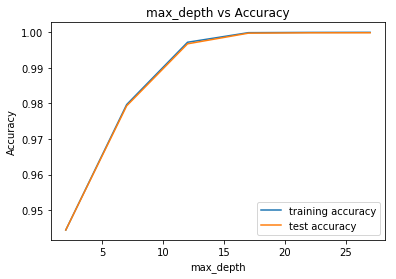

In [516]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores gradually increase till a point, but after that test score starts to decrease.

#### (ii) n_estimators Tuning:

In [517]:
# RandomizedSearchCV to find optimal n_estimators
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(50, 800, 200)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, n_jobs=-1, random_state=100)
rf.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 54.9min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'n_estimators': range(50, 800, 200)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [518]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,189.038235,1.702463,3.789676,0.312869,50,{'n_estimators': 50},0.991792,0.991657,0.991152,0.991534,0.000276,3,0.991683,0.992497,0.991653,0.991944,0.000391
1,977.278372,2.292080,11.232830,0.707535,250,{'n_estimators': 250},0.992101,0.991182,0.991257,0.991513,0.000417,4,0.991951,0.992192,0.991819,0.991987,0.000154
2,1372.711969,151.884033,12.973410,0.291117,450,{'n_estimators': 450},0.992049,0.991295,0.991325,0.991556,0.000348,1,0.991777,0.992196,0.991894,0.991956,0.000176
3,1277.355771,285.366379,8.479215,3.486167,650,{'n_estimators': 650},0.992049,0.991250,0.991370,0.991556,0.000352,1,0.991770,0.992116,0.991958,0.991948,0.000142


##### Plotting Accuracies with n_estimators:

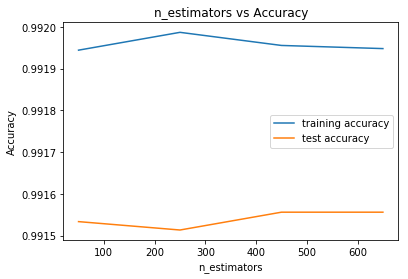

In [519]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

#### (iii) max_features Tuning:

In [520]:
# RandomizedSearchCV to find optimal max_features
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_features': [4, 8, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=100)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose = 1, random_state=100, n_jobs=-1, return_train_score=True)
rf.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 23.6min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1, param_distributions={'max_features': [4, 8, 24]},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [521]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,204.974698,0.607554,3.112014,0.179926,4,{'max_features': 4},0.990737,0.990187,0.990277,0.990400,0.000241,3,0.990715,0.990986,0.990854,0.990851,0.000111
1,394.055508,0.218344,3.930494,0.351866,8,{'max_features': 8},0.994121,0.994121,0.994438,0.994227,0.000149,2,0.994072,0.995014,0.994984,0.994690,0.000437
2,884.820685,64.568994,3.437652,2.491369,24,{'max_features': 24},0.996699,0.995968,0.996314,0.996327,0.000299,1,0.997083,0.996616,0.997019,0.996906,0.000207


##### Plotting Accuracies with max_features:

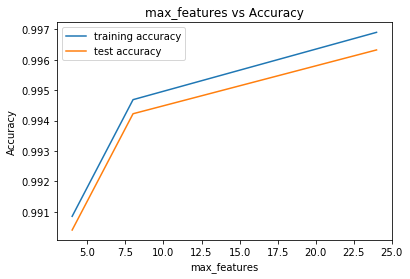

In [522]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.title("max_features vs Accuracy")
plt.legend()
plt.show()

#### (iv) min_samples_leaf Tuning:

In [523]:
# RandomizedSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 17.5min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': range(100, 400, 100)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [524]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,476.257737,10.323154,5.848898,0.116081,100,{'min_samples_leaf': 100},0.995606,0.995297,0.995011,0.995304,0.000243,1,0.995983,0.995945,0.996009,0.995979,0.000026
1,441.502781,14.543815,5.571152,0.623969,200,{'min_samples_leaf': 200},0.989938,0.988702,0.988747,0.989129,0.000572,2,0.989829,0.989591,0.989554,0.989658,0.000122
2,319.515903,135.013183,2.662869,1.023889,300,{'min_samples_leaf': 300},0.986313,0.986456,0.986245,0.986338,0.000088,3,0.986023,0.987281,0.986969,0.986758,0.000535


##### Plotting Accuracies with min_samples_leaf:

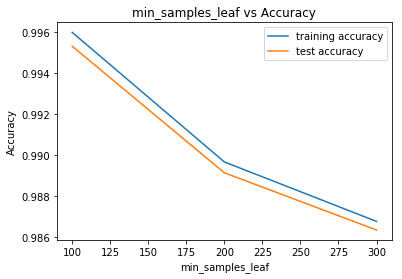

In [525]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_samples_leaf vs Accuracy")
plt.legend()
plt.show()

#### (v) min_samples_split Tuning:

In [526]:
# RandomizedSearchCV to find optimal min_samples_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(random_state=100, n_jobs=-1)


# fit tree on training data
rf = RandomizedSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1, return_train_score=True, random_state=100, n_jobs=-1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.7min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_split': range(200, 500, 50)},
                   random_state=100, return_train_score=True,
                   scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [527]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,177.326984,1.827706,1.450127,0.298872,200,{'min_samples_split': 200},0.999473,0.999157,0.999308,0.999313,0.000129,1,0.999308,0.999406,0.999376,0.999363,0.000041
1,177.420564,0.785137,1.124993,0.060441,250,{'min_samples_split': 250},0.999473,0.999142,0.999248,0.999288,0.000138,4,0.999315,0.999406,0.999338,0.999353,0.000038
2,177.225635,1.047348,1.404529,0.319219,300,{'min_samples_split': 300},0.999458,0.999157,0.999278,0.999298,0.000124,2,0.999330,0.999413,0.999330,0.999358,0.000039
3,179.241075,2.906914,2.432214,1.261068,350,{'min_samples_split': 350},0.999473,0.999157,0.999248,0.999293,0.000133,3,0.999323,0.999413,0.999330,0.999355,0.000041
4,181.435714,0.640553,2.004226,0.210804,400,{'min_samples_split': 400},0.999458,0.999157,0.999248,0.999288,0.000126,4,0.999323,0.999413,0.999308,0.999348,0.000047


##### Plotting Accuracies with min_samples_split:

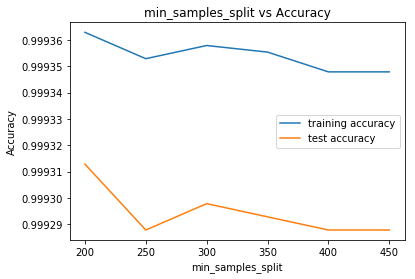

In [528]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_samples_split vs Accuracy")
plt.legend()
plt.show()

##### Randomized Search to Find Optimal Hyperparameters:

In [529]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 200),
    'min_samples_split': range(200, 400, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True,)
# Fit the grid search to the data
grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 70.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 300, 200),
                                        'min_samples_split': range(200, 400, 200),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, verbose=1)

##### Optimal Accuracy Score:

In [530]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9912873078082605


##### Optimal Hyperparameters:

In [531]:
grid_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 200,
 'min_samples_leaf': 100,
 'max_features': 10,
 'max_depth': 10}

In [532]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, random_state=100)

##### Running the model with best parameters obtained from grid search:

In [533]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300, random_state=100,
                             n_jobs=-1)
rfc_final.fit(X_adasyn, y_adasyn)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300, n_jobs=-1,
                       random_state=100)

##### Getting predicted values on Training set:

In [534]:
y_pred_train_rf = rfc_final.predict(X_adasyn)

##### Getting Classification Report for Training:

In [535]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_adasyn, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    199020
           1       1.00      0.99      0.99    199020

    accuracy                           0.99    398040
   macro avg       0.99      0.99      0.99    398040
weighted avg       0.99      0.99      0.99    398040



##### Confusion Matrix for training:

In [536]:
confusion_train_rf = confusion_matrix(y_adasyn, y_pred_train_rf)
confusion_train_rf

array([[198499,    521],
       [  2237, 196783]], dtype=int64)

##### Checking Training Accuracy:

In [537]:
print("Accuracy_Score: {}".format(rfc_final.score(X_adasyn, y_adasyn)))

Accuracy_Score: 0.9930710481358658


##### Other Training Metrics:

In [538]:
TP = confusion_train_rf[1,1] # true positive 
TN = confusion_train_rf[0,0] # true negatives
FP = confusion_train_rf[0,1] # false positives
FN = confusion_train_rf[1,0] # false negatives

accuracy = rfc_final.score(X_adasyn, y_adasyn)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train_rf)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,0.9931
Sensitivity,0.9888
Specificity,0.9974
True Positive Rate,0.9888
False Positive Rate,0.0026
Positive Predictive Value,0.9974
Negative Predictive Value,0.9889
Misclassification Rate,0.0069
Precision,0.9974
Recall,0.9888


##### Making prediction on Test:

In [539]:
y_pred_test_rf = rfc_final.predict(X_test)

##### Getting Classification Report for Test:

In [540]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.35      0.86      0.50       148

    accuracy                           1.00     85443
   macro avg       0.68      0.93      0.75     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [541]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)
confusion_test_rf

array([[85062,   233],
       [   21,   127]], dtype=int64)

##### Checking Test Accuracy:

In [542]:
print("Accuracy_Score: {}".format(rfc_final.score(X_test, y_test)))

Accuracy_Score: 0.9970272579380406


##### Other Test Metrics:

In [543]:
TP = confusion_test_rf[1,1] # true positive 
TN = confusion_test_rf[0,0] # true negatives
FP = confusion_test_rf[0,1] # false positives
FN = confusion_test_rf[1,0] # false negatives

accuracy = rfc_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,0.9931,0.9970
Sensitivity,0.9888,0.8581
Specificity,0.9974,0.9973
True Positive Rate,0.9888,0.8581
False Positive Rate,0.0026,0.0027
Positive Predictive Value,0.9974,0.3528
Negative Predictive Value,0.9889,0.9998
Misclassification Rate,0.0069,0.0030
Precision,0.9974,0.3528
Recall,0.9888,0.8581


## <center><u>Model 4: XGBoost

In [544]:
from xgboost import XGBClassifier
xgb_initial = XGBClassifier(random_state=100)
xgb_initial.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [545]:
y_pred_train = xgb_initial.predict(X_adasyn)

##### Confusion Matrix:

In [546]:
confusion_train = confusion_matrix(y_adasyn, y_pred_train)
confusion_train

array([[199020,      0],
       [     0, 199020]], dtype=int64)

##### Checking Train Accuracy:

In [547]:
print("Accuracy_Score: {}".format(accuracy_score(y_adasyn, y_pred_train)))

Accuracy_Score: 1.0


##### Other Training Metrics:

In [548]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_adasyn, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Getting predicted values on Test set:

In [549]:
y_pred_test = xgb_initial.predict(X_test)

##### Confusion Matrix for Test:

In [550]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[85264,    31],
       [   24,   124]], dtype=int64)

##### Checking Test Accuracy:

In [551]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9993562960102056


##### Other Test Metrics:

In [552]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9994
Sensitivity,1.0,0.8378
Specificity,1.0,0.9996
True Positive Rate,1.0,0.8378
False Positive Rate,0.0,0.0004
Positive Predictive Value,1.0,0.8000
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0006
Precision,1.0,0.8000
Recall,1.0,0.8378


Let's tune hyperparameters to het optimized results.

In [553]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(5, 25, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100, n_jobs=-1)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 25.7min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                             

##### Scores of GridSearch CV:

In [554]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,320.453695,0.445227,1.600389,0.097801,5,{'max_depth': 5},0.999789,0.999699,0.999729,0.999739,0.000038,4,0.999989,0.999996,0.999989,0.999991,0.000004
1,455.960552,9.480915,1.860362,0.034332,10,{'max_depth': 10},0.999804,0.999736,0.999842,0.999794,0.000044,3,1.000000,1.000000,1.000000,1.000000,0.000000
2,570.311782,42.780810,2.715721,0.589085,15,{'max_depth': 15},0.999812,0.999721,0.999872,0.999802,0.000062,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,601.486048,54.377910,1.322282,0.194908,20,{'max_depth': 20},0.999827,0.999721,0.999879,0.999809,0.000066,1,1.000000,1.000000,1.000000,1.000000,0.000000


##### Plotting Accuracies with max_depth:

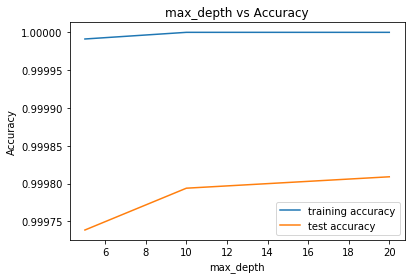

In [555]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

In [557]:
# RandomizedSearchCV to find optimal max_depth
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range(5, 30, 5)}

# instantiate the model
xgboost = XGBClassifier(random_state = 100)

# fit tree on training data
xg_boost = RandomizedSearchCV(xgboost,
                              parameters, 
                              cv=n_folds, 
                              scoring="accuracy",
                              return_train_score=True,
                              verbose=1,
                              n_jobs = -1)
xg_boost.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

In [558]:
scores = xg_boost.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,21.848922,0.047464,0.274268,0.010649,5,{'n_estimators': 5},0.985974,0.986034,0.986343,0.986117,0.000162,5,0.985725,0.987093,0.987410,0.986743,0.000731
1,41.243771,1.436851,0.337101,0.021125,10,{'n_estimators': 10},0.992033,0.990127,0.991039,0.991066,0.000779,4,0.992064,0.991238,0.991702,0.991668,0.000338
2,61.446969,0.896723,0.373000,0.006353,15,{'n_estimators': 15},0.994830,0.994242,0.993413,0.994161,0.000581,3,0.995131,0.995289,0.994132,0.994851,0.000512
3,76.483260,0.988720,0.463059,0.038799,20,{'n_estimators': 20},0.996149,0.996382,0.995470,0.996000,0.000387,2,0.996605,0.997196,0.996201,0.996667,0.000409
4,77.064099,7.439413,0.312784,0.033421,25,{'n_estimators': 25},0.997882,0.997988,0.997867,0.997912,0.000054,1,0.998508,0.998666,0.998432,0.998535,0.000097


##### Plotting Accuracies with max_depth:

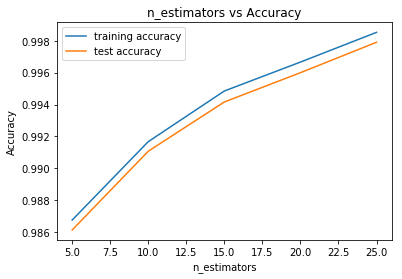

In [559]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

In [563]:
param_grid = {
    'max_depth': range(10, 40, 5),
    'n_estimators': range(10, 40, 5)
}
# Create a based model
xgboost = XGBClassifier(random_state=100)
# Instantiate the Randomized search model
grid_search = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid,
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
# Fit the grid search to the data
grid_search.fit(X_adasyn, y_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 27.5min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=100, reg_alpha=None,
                           

##### Optimal Accuracy Score:

In [564]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.9997060596924933


##### Optimal Hyperparameters:

In [565]:
grid_search.best_params_

{'n_estimators': 35, 'max_depth': 35}

In [566]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=35, n_jobs=0, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Running the model with best parameters obtained from grid search:

In [567]:
# model with the best hyperparameters
from xgboost import XGBClassifier
xgb_final = XGBClassifier(   max_depth=35,
                             n_estimators=35, 
                             random_state=100,
                             n_jobs=-1)
xgb_final.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=35,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=35, n_jobs=-1, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Getting predicted values on Training set:

In [568]:
y_pred_train_xgb_final = xgb_final.predict(X_adasyn)

##### Getting Classification Report for Training:

In [569]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_adasyn, y_pred_train_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



##### Confusion Matrix for training:

In [570]:
confusion_train_xgb_final = confusion_matrix(y_adasyn, y_pred_train_xgb_final)
confusion_train_xgb_final

array([[199014,      6],
       [     0, 199020]], dtype=int64)

##### Checking Training Accuracy:

In [571]:
print("Accuracy_Score: {}".format(xgb_final.score(X_adasyn, y_adasyn)))

Accuracy_Score: 0.9999849261380765


##### Other Training Metrics:

In [573]:
TP = confusion_train_xgb_final[1,1] # true positive 
TN = confusion_train_xgb_final[0,0] # true negatives
FP = confusion_train_xgb_final[0,1] # false positives
FN = confusion_train_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_adasyn, y_adasyn)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_adasyn, y_pred_train_xgb_final)

#Metrics Dataframe
metrics_xgb_final_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_train = metrics_xgb_final_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_xgb_final_train, 4)

,Metrics_Training
Accuracy,1.0
Sensitivity,1.0
Specificity,1.0
True Positive Rate,1.0
False Positive Rate,0.0
Positive Predictive Value,1.0
Negative Predictive Value,1.0
Misclassification Rate,0.0
Precision,1.0
Recall,1.0


##### Making prediction on Test:

In [574]:
y_pred_test_xgb_final = xgb_final.predict(X_test)

##### Getting Classification Report for Test:

In [575]:
print(classification_report(y_test, y_pred_test_xgb_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.84      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443



##### Confusion Matrix for Test:

In [576]:
confusion_test_xgb_final = confusion_matrix(y_test, y_pred_test_xgb_final)
confusion_test_xgb_final

array([[85255,    40],
       [   24,   124]], dtype=int64)

##### Checking Test Accuracy:

In [577]:
print("Accuracy_Score: {}".format(xgb_final.score(X_test, y_test)))

Accuracy_Score: 0.9992509626300574


##### Other Test Metrics:

In [578]:
TP = confusion_test_xgb_final[1,1] # true positive 
TN = confusion_test_xgb_final[0,0] # true negatives
FP = confusion_test_xgb_final[0,1] # false positives
FN = confusion_test_xgb_final[1,0] # false negatives

accuracy = xgb_final.score(X_test, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_xgb_final)

#Metrics Dataframe
metrics_xgb_final_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_xgb_final_test = metrics_xgb_final_test.T.rename(columns={0: 'Metrics_Test'})
metrics_xgb_final_test = pd.concat([metrics_xgb_final_train, metrics_xgb_final_test], axis=1)
round(metrics_xgb_final_test, 4)

,Metrics_Training,Metrics_Test
Accuracy,1.0,0.9993
Sensitivity,1.0,0.8378
Specificity,1.0,0.9995
True Positive Rate,1.0,0.8378
False Positive Rate,0.0,0.0005
Positive Predictive Value,1.0,0.7561
Negative Predictive Value,1.0,0.9997
Misclassification Rate,0.0,0.0007
Precision,1.0,0.7561
Recall,1.0,0.8378


# Conclusion and Reccomendation to the Bank:

We built 16 models in total, four with imbalanced data just to compare and see the importance of treating imbalance in data. As expected, key metrics improved after the imbalance was treated. Random Oversampling, SMOTE and ADASYN were the techniques used, and each of the four models were built for each of these imbalancing technique. Of the 12 models we built on balanced data, an examination of the metrics tells us that below are the best models:

- Logistic Regression with Random Oversampling
- Logistic Regression with SMOTE
- Random Forest with Random Oversampling

**Logistic Regression with Random Oversampling** has the best performance in terms of the metrics of these three. The important metrics such as sensitivity, specificity and misclassification rates are close to ideal and their differences with test data too is the least among all models. **This would be the model we would recommend to the Bank from a performance standpoint**, and this will ensure optimal cost benefit to the bank.

Below are the metrics for Logistic Regression with Random Oversampling:

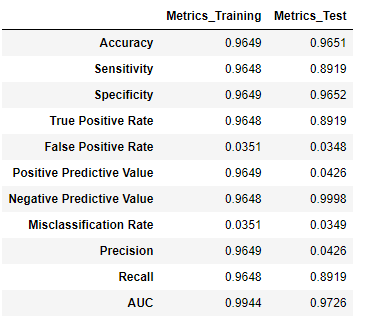